In my work, I decided to research people's opinions about gpt chat. The aim is to check in how many people the chat evokes positive emotions, e.g. by helping them at work, and in how many - negative emotions, e.g. related to the fear of being replaced by such a device in their work. <br>
The data was downloaded from several large regions of the world (continental division).

In [ ]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install deep-translator
import snscrape.modules.twitter as sntwitter
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from deep_translator import GoogleTranslator
import nltk
nltk.download('all')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
!pip install text2emotion
import text2emotion as te
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('vader_lexicon')
!pip install nrclex
from nrclex import NRCLex
import numpy as np
!pip install googletrans
from googletrans import Translator
#!pip install emoji==1.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-1cjdewxj
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-1cjdewxj
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit e4c7644bf5e4917107b31b353cabfdaae906429f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I decided to use geographic coordinates with a radius to determine the location. The areas were set manually thanks to the website: https://www.mapdevelopers.com/draw-circle-tool.php

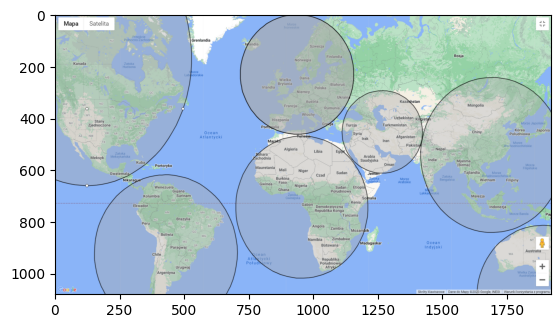

In [ ]:
img = mpimg.imread('/content/world.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
loc = '53.0, 6.0, 2000km' # Europe
loc= '-1.697470,8.593610, 4000km' #Africa
loc = '34.032523,52.307685,2000km' # West Asia
loc = '20.261090,111.875263,4000km' # East asia
loc = '-38.866612,139.360963,3000km' #Australia and stuff
loc = '-20.700230,-65.266969,4000km'#South America
loc = '45.452631,-108.111149,4000km'  # North America

In [ ]:
import datetime
start_dt = '20221201'
end_dt = '20230501'
start = datetime.datetime.strptime(start_dt, '%Y%m%d')
end = datetime.datetime.strptime(end_dt, '%Y%m%d')
step = datetime.timedelta(days=1)
date_list = []
while start <= end:
  date_list.append(start.date().strftime("%Y-%m-%d"))
  start += step
date_list[0]

'2022-12-01'

In [ ]:
Coordinates = ['53.0, 6.0, 2000km','-1.697470,8.593610, 4000km','34.032523,52.307685,2000km','20.261090,111.875263,4000km','-38.866612,139.360963,3000km','-20.700230,-65.266969,4000km','45.452631,-108.111149,4000km']
Continents = ['Europe','Africa','West Asia','East Asia','Australia','South America','North America']

I will run sns scraper for Europe and some gpt chat related phrases.

In [ ]:

tweets_list3 = []
tweets_df3 = pd.DataFrame(tweets_list3, columns=['Datetime', 'Lang', 'Text', 'Username','Continent'])

for k in range(len(Continents)):
  loc=Coordinates[k]
  Continent=Continents[k]
  print(Continent)
  # Creating list to append tweet data to
  tweets_list3 = []

  #nasa esa Containing both "nasa" and "esa". Spaces are implicit AND.

  #(nasa esa) Brackets can be used to group individual words if using other operators.

  for j in range(1,len(date_list)):
    date=date_list[j-1]
    date2=date_list[j]
    print(date)
    #Using TwitterSearchScraper to scrape data and append tweets to list
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('"chat gpt" OR "Bing Chat" OR "Bing AI" OR "ChatGPT" OR "ChatGPT 3" OR "ChatGPT 4" OR "ChatGPT-3" OR "ChatGPT-4" geocode:"{geo}" since:{since} until:{until}' .format(geo=loc,since=date,until=date2)).get_items()):
        if i>19:
            break
        tweets_list3.append([tweet.date, tweet.lang, tweet.content, tweet.user.username, Continent])


  # Creating a dataframe from the tweets list above
  tweets_df3 = tweets_df3.append(pd.DataFrame( tweets_list3,
               columns=['Datetime', 'Lang', 'Text', 'Username','Continent']),
               ignore_index = True)

Europe
2022-12-01


<ipython-input-34-f2704e1f718b>:23: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list3.append([tweet.date, tweet.lang, tweet.content, tweet.user.username, Continent])


2022-12-02
2022-12-03
2022-12-04
2022-12-05
2022-12-06
2022-12-07
2022-12-08
2022-12-09
2022-12-10
2022-12-11
2022-12-12
2022-12-13
2022-12-14
2022-12-15
2022-12-16
2022-12-17
2022-12-18
2022-12-19
2022-12-20
2022-12-21
2022-12-22
2022-12-23
2022-12-24
2022-12-25
2022-12-26
2022-12-27
2022-12-28
2022-12-29
2022-12-30
2022-12-31


2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-07
2023-01-08
2023-01-09
2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-14
2023-01-15
2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-18
2023-02-19
2023-02-20
2023-02-21
2023-02-22
2023-02-23
2023-02-24
2023-02-25
2023-02-26
2023-02-27
2023-02-28
2023-03-01
2023-03-02
2023-03-03
2023-03-04
2023-03-05
2023-03-06
2023-03-07
2023-03-08
2023-03-09
2023-03-10
2023-03-11
2023-03-12
2023-03-13
2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-18


2023-03-19
2023-03-20
2023-03-21
2023-03-22


2023-03-23


2023-03-24
2023-03-25
2023-03-26
2023-03-27
2023-03-28


2023-03-29
2023-03-30
2023-03-31
2023-04-01
2023-04-02
2023-04-03
2023-04-04
2023-04-05
2023-04-06
2023-04-07
2023-04-08
2023-04-09
2023-04-10
2023-04-11
2023-04-12
2023-04-13
2023-04-14
2023-04-15
2023-04-16
2023-04-17
2023-04-18
2023-04-19
2023-04-20
2023-04-21
2023-04-22
2023-04-23
2023-04-24
2023-04-25
2023-04-26
2023-04-27
2023-04-28
2023-04-29
2023-04-30


<ipython-input-34-f2704e1f718b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df3 = tweets_df3.append(pd.DataFrame( tweets_list3,


Africa
2022-12-01


<ipython-input-34-f2704e1f718b>:23: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list3.append([tweet.date, tweet.lang, tweet.content, tweet.user.username, Continent])


2022-12-02


2022-12-03


2022-12-04


2022-12-05
2022-12-06
2022-12-07
2022-12-08
2022-12-09
2022-12-10


2022-12-11


2022-12-12
2022-12-13


2022-12-14


2022-12-15


2022-12-16
2022-12-17


2022-12-18


2022-12-19


2022-12-20


2022-12-21


2022-12-22


2022-12-23


2022-12-24


2022-12-25


2022-12-26
2022-12-27


2022-12-28


2022-12-29


2022-12-30


2022-12-31


2023-01-01


2023-01-02


2023-01-03


2023-01-04
2023-01-05
2023-01-06
2023-01-07
2023-01-08


2023-01-09


2023-01-10
2023-01-11
2023-01-12


2023-01-13
2023-01-14
2023-01-15


2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22


2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29


2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11


2023-02-12
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-18
2023-02-19
2023-02-20
2023-02-21
2023-02-22
2023-02-23


2023-02-24


2023-02-25
2023-02-26


2023-02-27
2023-02-28


2023-03-01


2023-03-02
2023-03-03


2023-03-04
2023-03-05
2023-03-06
2023-03-07
2023-03-08
2023-03-09


2023-03-10
2023-03-11
2023-03-12


2023-03-13
2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-18
2023-03-19
2023-03-20
2023-03-21
2023-03-22
2023-03-23
2023-03-24
2023-03-25
2023-03-26
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-01
2023-04-02
2023-04-03
2023-04-04
2023-04-05
2023-04-06
2023-04-07
2023-04-08
2023-04-09


2023-04-10
2023-04-11
2023-04-12
2023-04-13
2023-04-14
2023-04-15
2023-04-16


2023-04-17
2023-04-18
2023-04-19
2023-04-20
2023-04-21
2023-04-22


2023-04-23


2023-04-24
2023-04-25
2023-04-26
2023-04-27
2023-04-28
2023-04-29


2023-04-30


<ipython-input-34-f2704e1f718b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df3 = tweets_df3.append(pd.DataFrame( tweets_list3,


West Asia
2022-12-01


<ipython-input-34-f2704e1f718b>:23: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list3.append([tweet.date, tweet.lang, tweet.content, tweet.user.username, Continent])


2022-12-02


2022-12-03
2022-12-04


2022-12-05


2022-12-06
2022-12-07
2022-12-08
2022-12-09
2022-12-10
2022-12-11
2022-12-12


2022-12-13
2022-12-14


2022-12-15


2022-12-16


2022-12-17


2022-12-18


2022-12-19


2022-12-20


2022-12-21


2022-12-22


2022-12-23


2022-12-24


2022-12-25


2022-12-26


2022-12-27


2022-12-28


2022-12-29


2022-12-30


2022-12-31


2023-01-01


2023-01-02


2023-01-03


2023-01-04


2023-01-05
2023-01-06
2023-01-07


2023-01-08
2023-01-09


2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-14
2023-01-15
2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-18
2023-02-19
2023-02-20
2023-02-21
2023-02-22
2023-02-23
2023-02-24
2023-02-25
2023-02-26
2023-02-27
2023-02-28
2023-03-01
2023-03-02
2023-03-03
2023-03-04
2023-03-05
2023-03-06
2023-03-07
2023-03-08
2023-03-09
2023-03-10
2023-03-11
2023-03-12
2023-03-13
2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-18
2023-03-19
2023-03-20
2023-03-21
2023-03-22
2023-03-23
2023-03-24
2023-03-25
2023-03-26
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-01
2023-04-02
2023-04-03
2023-04-04
2023-04-05
2023-04-06
2023-04-07
2023-04-08
2023-04-09
2023-04-10

<ipython-input-34-f2704e1f718b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df3 = tweets_df3.append(pd.DataFrame( tweets_list3,


East Asia
2022-12-01


<ipython-input-34-f2704e1f718b>:23: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list3.append([tweet.date, tweet.lang, tweet.content, tweet.user.username, Continent])


2022-12-02
2022-12-03
2022-12-04
2022-12-05
2022-12-06
2022-12-07
2022-12-08
2022-12-09
2022-12-10
2022-12-11
2022-12-12
2022-12-13
2022-12-14
2022-12-15
2022-12-16


2022-12-17


2022-12-18


2022-12-19


2022-12-20


2022-12-21


2022-12-22


2022-12-23


2022-12-24


2022-12-25


2022-12-26


2022-12-27
2022-12-28


2022-12-29


2022-12-30


2022-12-31


2023-01-01


2023-01-02


2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-07
2023-01-08
2023-01-09
2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-14
2023-01-15
2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-18
2023-02-19
2023-02-20
2023-02-21
2023-02-22
2023-02-23
2023-02-24
2023-02-25
2023-02-26
2023-02-27
2023-02-28
2023-03-01
2023-03-02
2023-03-03
2023-03-04
2023-03-05
2023-03-06
2023-03-07
2023-03-08
2023-03-09
2023-03-10
2023-03-11
2023-03-12
2023-03-13
2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-18
2023-03-19
2023-03-20
2023-03-21
2023-03-22
2023-03-23
2023-03-24
2023-03-25
2023-03-26
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-01
2023-04-02
2023-04-03

2023-04-28
2023-04-29


2023-04-30


<ipython-input-34-f2704e1f718b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df3 = tweets_df3.append(pd.DataFrame( tweets_list3,


Australia
2022-12-01


<ipython-input-34-f2704e1f718b>:23: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list3.append([tweet.date, tweet.lang, tweet.content, tweet.user.username, Continent])


2022-12-02


2022-12-03


2022-12-04


2022-12-05
2022-12-06


2022-12-07


2022-12-08


2022-12-09


2022-12-10


2022-12-11


2022-12-12


2022-12-13


2022-12-14


2022-12-15


2022-12-16


2022-12-17


2022-12-18


2022-12-19


2022-12-20


2022-12-21


2022-12-22


2022-12-23


2022-12-24


2022-12-25


2022-12-26


2022-12-27


2022-12-28


2022-12-29


2022-12-30


2022-12-31


2023-01-01


2023-01-02


2023-01-03


2023-01-04


2023-01-05


2023-01-06


2023-01-07


2023-01-08


2023-01-09


2023-01-10


2023-01-11


2023-01-12


2023-01-13


2023-01-14


2023-01-15


2023-01-16


2023-01-17


2023-01-18


2023-01-19


2023-01-20


2023-01-21


2023-01-22


2023-01-23


2023-01-24


2023-01-25


2023-01-26


2023-01-27


2023-01-28


2023-01-29


2023-01-30


2023-01-31


2023-02-01


2023-02-02


2023-02-03


2023-02-04


2023-02-05


2023-02-06


2023-02-07


2023-02-08


2023-02-09


2023-02-10


2023-02-11
2023-02-12
2023-02-13


2023-02-14


2023-02-15


2023-02-16


2023-02-17


2023-02-18


2023-02-19


2023-02-20


2023-02-21


2023-02-22


2023-02-23


2023-02-24


2023-02-25


2023-02-26


2023-02-27


2023-02-28


2023-03-01


2023-03-02


2023-03-03


2023-03-04


2023-03-05


2023-03-06


2023-03-07


2023-03-08


2023-03-09


2023-03-10


2023-03-11


2023-03-12


2023-03-13


2023-03-14


2023-03-15


2023-03-16


2023-03-17


2023-03-18


2023-03-19


2023-03-20


2023-03-21


2023-03-22


2023-03-23


2023-03-24


2023-03-25


2023-03-26


2023-03-27


2023-03-28


2023-03-29


2023-03-30


2023-03-31


2023-04-01


2023-04-02


2023-04-03


2023-04-04


2023-04-05


2023-04-06


2023-04-07


2023-04-08


2023-04-09


2023-04-10


2023-04-11


2023-04-12


2023-04-13


2023-04-14


2023-04-15


2023-04-16


2023-04-17


2023-04-18


2023-04-19


2023-04-20


2023-04-21


2023-04-22


2023-04-23


2023-04-24


2023-04-25


2023-04-26


2023-04-27


2023-04-28


2023-04-29


2023-04-30


<ipython-input-34-f2704e1f718b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df3 = tweets_df3.append(pd.DataFrame( tweets_list3,


South America
2022-12-01


2022-12-02


<ipython-input-34-f2704e1f718b>:23: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list3.append([tweet.date, tweet.lang, tweet.content, tweet.user.username, Continent])


2022-12-03


2022-12-04


2022-12-05


2022-12-06


2022-12-07


2022-12-08


2022-12-09


2022-12-10


2022-12-11


2022-12-12


2022-12-13


2022-12-14


2022-12-15


2022-12-16


2022-12-17


2022-12-18


2022-12-19


2022-12-20


2022-12-21


2022-12-22


2022-12-23


2022-12-24


2022-12-25


2022-12-26


2022-12-27


2022-12-28


2022-12-29


2022-12-30


2022-12-31


2023-01-01


2023-01-02


2023-01-03


2023-01-04


2023-01-05


2023-01-06


2023-01-07


2023-01-08


2023-01-09


2023-01-10


2023-01-11


2023-01-12


2023-01-13


2023-01-14


2023-01-15


2023-01-16


2023-01-17


2023-01-18


2023-01-19
2023-01-20


2023-01-21


2023-01-22


2023-01-23


2023-01-24


2023-01-25
2023-01-26


2023-01-27


2023-01-28


2023-01-29


2023-01-30
2023-01-31
2023-02-01
2023-02-02


2023-02-03
2023-02-04
2023-02-05


2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13


2023-02-14
2023-02-15


2023-02-16


2023-02-17
2023-02-18
2023-02-19


2023-02-20


2023-02-21
2023-02-22
2023-02-23


2023-02-24


2023-02-25


2023-02-26


2023-02-27


2023-02-28


2023-03-01


2023-03-02
2023-03-03


2023-03-04


2023-03-05


2023-03-06


2023-03-07
2023-03-08
2023-03-09


2023-03-10


2023-03-11
2023-03-12


2023-03-13
2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-18
2023-03-19
2023-03-20


2023-03-21
2023-03-22
2023-03-23
2023-03-24
2023-03-25
2023-03-26
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-01
2023-04-02
2023-04-03
2023-04-04
2023-04-05
2023-04-06
2023-04-07


2023-04-08


2023-04-09


2023-04-10
2023-04-11
2023-04-12
2023-04-13
2023-04-14


2023-04-15
2023-04-16


2023-04-17
2023-04-18
2023-04-19


2023-04-20
2023-04-21
2023-04-22


2023-04-23


2023-04-24
2023-04-25
2023-04-26
2023-04-27
2023-04-28


2023-04-29


2023-04-30


<ipython-input-34-f2704e1f718b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df3 = tweets_df3.append(pd.DataFrame( tweets_list3,


North America
2022-12-01


<ipython-input-34-f2704e1f718b>:23: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list3.append([tweet.date, tweet.lang, tweet.content, tweet.user.username, Continent])


2022-12-02
2022-12-03
2022-12-04
2022-12-05
2022-12-06
2022-12-07
2022-12-08
2022-12-09
2022-12-10
2022-12-11
2022-12-12
2022-12-13
2022-12-14
2022-12-15
2022-12-16
2022-12-17
2022-12-18
2022-12-19
2022-12-20
2022-12-21
2022-12-22
2022-12-23
2022-12-24
2022-12-25
2022-12-26


2022-12-27
2022-12-28
2022-12-29
2022-12-30
2022-12-31


2023-01-01


2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-07
2023-01-08
2023-01-09
2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-14
2023-01-15
2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-18
2023-02-19
2023-02-20
2023-02-21
2023-02-22
2023-02-23


2023-02-24
2023-02-25
2023-02-26
2023-02-27
2023-02-28
2023-03-01
2023-03-02


2023-03-03
2023-03-04
2023-03-05
2023-03-06
2023-03-07
2023-03-08
2023-03-09
2023-03-10
2023-03-11
2023-03-12
2023-03-13


2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-18
2023-03-19
2023-03-20
2023-03-21
2023-03-22
2023-03-23
2023-03-24
2023-03-25


2023-03-26
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-01
2023-04-02
2023-04-03
2023-04-04
2023-04-05
2023-04-06
2023-04-07
2023-04-08
2023-04-09
2023-04-10
2023-04-11
2023-04-12
2023-04-13
2023-04-14
2023-04-15
2023-04-16
2023-04-17
2023-04-18
2023-04-19
2023-04-20
2023-04-21
2023-04-22
2023-04-23
2023-04-24
2023-04-25
2023-04-26
2023-04-27
2023-04-28
2023-04-29
2023-04-30


<ipython-input-34-f2704e1f718b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df3 = tweets_df3.append(pd.DataFrame( tweets_list3,


In [ ]:
tweets_df3.to_pickle('tweets_df3.pkl')

In [ ]:
l=[2,3,5,6,76,9]
for i in l:
  if i > 10:
    continue
  elif i%2==0:
    print(i)
  else:
    print(i)

# a=GoogleTranslator(source = 'auto', target='en').translate('🙏🙏🙏')
# len(tweets_df3['Text'][0])

2
3
5
6
9


In [ ]:
(tweets_df3.Continent.values == 'Australia').sum()
#len(tweets_df3)

1357

In [ ]:
for i in range(len(tweets_df3)):
  print(tweets_df3['Datetime'][i],tweets_df3['Text'][i],tweets_df3['Continent'][i])
  print('--------------------------')

2023-02-01 23:40:22+00:00 @satyanadella We need an Organisational Chat GPT like on SharePoint. This would be the ultimate search experience! Europe
--------------------------
2023-02-01 23:10:24+00:00 @jb55 ChatGPT helped me finish 2 books and create a whole new one evening last week. Europe
--------------------------
2023-02-01 23:06:00+00:00 @elonmusk @LeighWolf @elonmusk buy ChatGPT Europe
--------------------------
2023-02-01 22:58:11+00:00 @elliejennie ChatGPT я не пробовала для этого, а Grammarly постоянно использую в работе, он действительно хорошо проверяет текст и подсказывает, как лучше переформулировать что-то :) Плюс делает наглядно! Europe
--------------------------
2023-02-01 22:38:51+00:00 Natuurlijk.... vroeg ik ChatGPT om een voorstel voor scenario's voor je organisatiestategie waarmee je kan anticiperen op de zeespiegelstijging. https://t.co/sHoSIPhrOC Europe
--------------------------
2023-02-01 22:34:50+00:00 OK so finally had time to properly play with my in house 

As we can see, throughout Europe, comments can be written in different languages. We have to translate all comments into one language.

In [ ]:
l=['tak','tak 22','nie']
for i in l:
  if i.isdigit():
    continue
  else: print(i)

tak
tak 22
nie


In [ ]:
l=[]
for i in range(len(tweets_df3['Text'])):
  print(i)
  if len(tweets_df3['Text'][i])>4900:
    continue
  elif tweets_df3['Text'][i].isdigit():
    continue
  elif tweets_df3['Lang'][i] == 'en':
    l.append(tweets_df3['Text'][i])
  else:
    l.append(GoogleTranslator(source = 'auto', target='en').translate(tweets_df3['Text'][i]))

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979

In [ ]:
tweets_df3['Translate']=l

In [ ]:
for i in range(10):
  print('----------------------------------------------------- ')
  print(tweets_df3['Translate'][i],tweets_df3['Username'][i],tweets_df3['Lang'][i])

----------------------------------------------------- 
We are becoming redundant @JorritBlaas 🙃. The ChatGPT at @OpenAI writes excellent advice for our minister of @MinOCW (via https://t.co/89X9dfmyHX) https://t.co/6DsCiNrVd9 jwhengeveld nl
----------------------------------------------------- 
I think Google and teachers are dead for informational queries. I have tried many examples, and ChatGPT was x100 better than Google! 🤯 https://t.co/ylCNVagzwo victorianoi en
----------------------------------------------------- 
#ChatGPT is WILD. 

Scanning through the uses showcased today blows my tiny mind. The progress of #AI currently is bonkers.  And not a little unsettling. https://t.co/Rb1BWSXumN thedimmick en
----------------------------------------------------- 
ChatGPT is pretty crazy. tuomas_h en
----------------------------------------------------- 
Imagine chatGPT bots on Twitter posing as humans. Could they pass a Turing test? #ShowerThoughts FarberKostya en
-----------------------

In [ ]:
tweets_df3.to_pickle('tweets_df3_trans.pkl')

In [ ]:
tweets_df3=pd.read_pickle('/content/tweets_df3_trans.pkl')

After translating the texts, I will do further preprocessing.

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ["'s",'.',',',"?","!","n't","(",")","[","]","’",":","``","''","'d","#","@",'-','https',';','...','&','“','”','..','»',"'m",'chatgpt','gpt','ai','chat','openai','%']
stopwords.extend(newStopWords)
lemmatizer = WordNetLemmatizer()

In [ ]:
def remove_elements(test_list, test_str):
    if not test_list: # base case
        return []
    elif any(ele in test_str for ele in test_list[0]): # check if element contains string character
        return remove_elements(test_list[1:], test_str)
    else:
        return [test_list[0]] + remove_elements(test_list[1:], test_str)

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords]
    test_str = '//'
    filtered_list=remove_elements(filtered_tokens, test_str)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_list]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [ ]:
tweets_df3['Processed'] =tweets_df3['Translate'].apply(preprocess_text)

In [ ]:
for i in range(5):
  print('----------------------------------------------------- ')
  print(tweets_df3['Processed'][i],tweets_df3['Username'][i],tweets_df3['Lang'][i])

----------------------------------------------------- 
becoming redundant jorritblaas 🙃 writes excellent advice minister minocw via jwhengeveld nl
----------------------------------------------------- 
think google teacher dead informational query tried many example x100 better google 🤯 victorianoi en
----------------------------------------------------- 
wild scanning us showcased today blow tiny mind progress currently bonkers little unsettling thedimmick en
----------------------------------------------------- 
pretty crazy tuomas_h en
----------------------------------------------------- 
imagine bot twitter posing human could pas turing test showerthoughts FarberKostya en


In [ ]:
text=''
for i in tweets_df3['Processed']:
  text=text+' ' + i
text

" becoming redundant jorritblaas 🙃 writes excellent advice minister minocw via think google teacher dead informational query tried many example x100 better google 🤯 wild scanning us showcased today blow tiny mind progress currently bonkers little unsettling pretty crazy imagine bot twitter posing human could pas turing test showerthoughts fluidity rather complex conversation remarkable model mainly many shared amazement capability year ui made accessible… reinforcing idea deployment product research point new amazing indeed ...... artificial intelligence quality written text internet drastically improve sure impressive ingenuity devise trick honestly blown away perfect capability form factor allows anyone play around make feel like real pivotal moment need connected web access real time us case 🤯 even included hope email find well. literacy skill write poem red fish turtle swimming aegean sea really highlight rate acceleration increasing rate speed space government really need wake tak

In [ ]:
from collections import Counter
split_it = text.split()
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(15)

print(most_occur)

[('use', 1389), ('like', 1304), ('google', 1011), ('sunset', 935), ('sunrise', 934), ('using', 877), ('asked', 866), ('answer', 849), ('write', 845), ('know', 843), ('time', 840), ('think', 772), ('one', 769), ('new', 744), ('question', 740)]


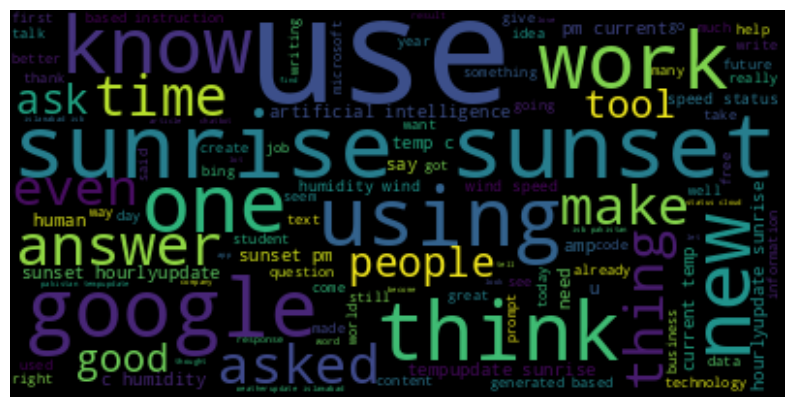

In [ ]:
wordcloud = WordCloud().generate(text)
plt.rcParams['figure.figsize'] = [10, 10]
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
l1=[]
l2=[]
l3=[]
for i in range(len(tweets_df3['Translate'])):
  Sentiment=sid.polarity_scores(tweets_df3['Processed'][i])
  l1.append(Sentiment['neg'])
  l2.append(Sentiment['neu'])
  l3.append(Sentiment['pos'])

In [ ]:
tweets_df3['Negative']=l1
tweets_df3['Neutral']=l2
tweets_df3['Positive']=l3

In [ ]:
for i in range(5):
  print('----------------------------------------------------- ')
  print(tweets_df3['Processed'][i],tweets_df3['Negative'][i],tweets_df3['Neutral'][i],tweets_df3['Positive'][i])

----------------------------------------------------- 
becoming redundant jorritblaas 🙃 writes excellent advice minister minocw via 0.0 0.684 0.316
----------------------------------------------------- 
think google teacher dead informational query tried many example x100 better google 🤯 0.25 0.581 0.169
----------------------------------------------------- 
wild scanning us showcased today blow tiny mind progress currently bonkers little unsettling 0.0 0.811 0.189
----------------------------------------------------- 
pretty crazy 0.429 0.0 0.571
----------------------------------------------------- 
imagine bot twitter posing human could pas turing test showerthoughts 0.0 1.0 0.0


In [ ]:
print(tweets_df3['Negative'].mean(),tweets_df3['Positive'].mean(),tweets_df3['Neutral'].mean())

0.07065490350089768 0.17940462298025134 0.7414688622082585


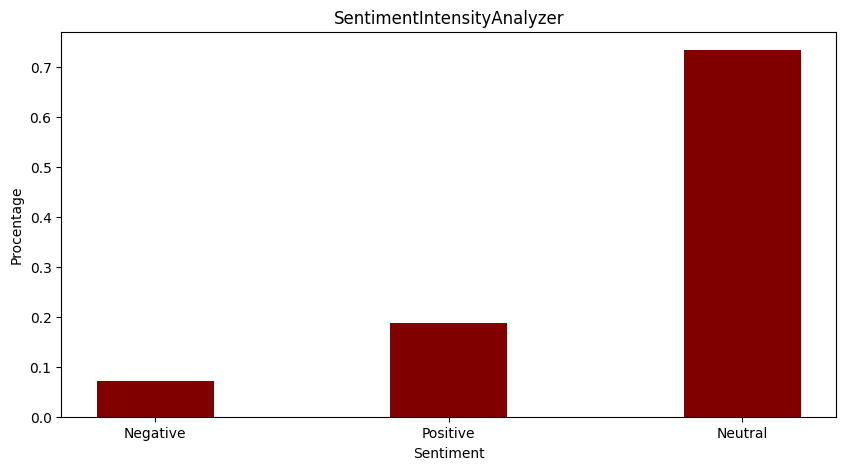

In [ ]:

names = ['Negative','Positive','Neutral']
values = [0.072,0.187,0.733]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(names, values, color ='maroon',
        width = 0.4)

plt.xlabel("Sentiment")
plt.ylabel("Precent")
plt.title("SentimentIntensityAnalyzer")
plt.show()

In [ ]:

l1=[]
l2=[]
l3=[]
l4=[]
l5=[]

for i in range(len(tweets_df3['Processed'])):
  emotion=te.get_emotion(tweets_df3['Processed'][i])
  l1.append(emotion['Happy'])
  l2.append(emotion['Angry'])
  l3.append(emotion['Surprise'])
  l4.append(emotion['Sad'])
  l5.append(emotion['Fear'])

In [ ]:
tweets_df3['Happy']=l1
tweets_df3['Angry']=l2
tweets_df3['Surprise']=l3
tweets_df3['Sad']=l4
tweets_df3['Fear']=l5

In [ ]:
for i in range(5):
  print('----------------------------------------------------- ')
  print(tweets_df3['Processed'][i],tweets_df3['Happy'][i],tweets_df3['Angry'][i],tweets_df3['Surprise'][i],tweets_df3['Sad'][i],tweets_df3['Fear'][i])

----------------------------------------------------- 
becoming redundant jorritblaas 🙃 writes excellent advice minister minocw via 1.0 0.0 0.0 0.0 0.0
----------------------------------------------------- 
think google teacher dead informational query tried many example x100 better google 🤯 0.0 0.0 0.0 0.0 1.0
----------------------------------------------------- 
wild scanning us showcased today blow tiny mind progress currently bonkers little unsettling 0.0 0.0 1.0 0.0 0.0
----------------------------------------------------- 
pretty crazy 0.5 0.0 0.0 0.0 0.5
----------------------------------------------------- 
imagine bot twitter posing human could pas turing test showerthoughts 0.0 0.0 0.33 0.33 0.33


In [ ]:
print(tweets_df3['Happy'].mean(),tweets_df3['Angry'].mean(),tweets_df3['Surprise'].mean(),tweets_df3['Sad'].mean(),tweets_df3['Fear'].mean())

0.10321869389587075 0.03393289946140036 0.11591954667863555 0.17394580341113108 0.3234644299820467


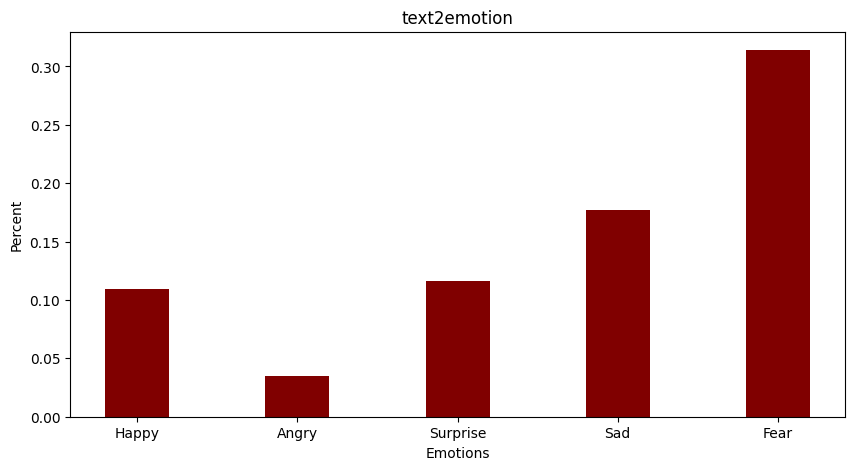

In [ ]:
names = ['Happy','Angry','Surprise','Sad','Fear']
values = [0.109,0.035,0.116,0.177,0.314]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(names, values, color ='maroon',
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("Percent")
plt.title("text2emotion")
plt.show()

In [ ]:
from nrclex import NRCLex
l1=[]

for i in range(len(tweets_df3['Processed'])):
  emotion = NRCLex(tweets_df3['Processed'][i])
  if emotion.top_emotions[0][1] != 0:
    l1.append(emotion.top_emotions[0][0])
  else: l1.append('NA')

In [ ]:
tweets_df3['Top_emo']=l1

In [ ]:
tweets_df3.Top_emo.value_counts()

positive        6301
NA              4563
trust           2763
fear            1663
negative        1050
anticipation     745
anger            418
surprise         278
sadness           26
disgust           10
joy                7
Name: Top_emo, dtype: int64

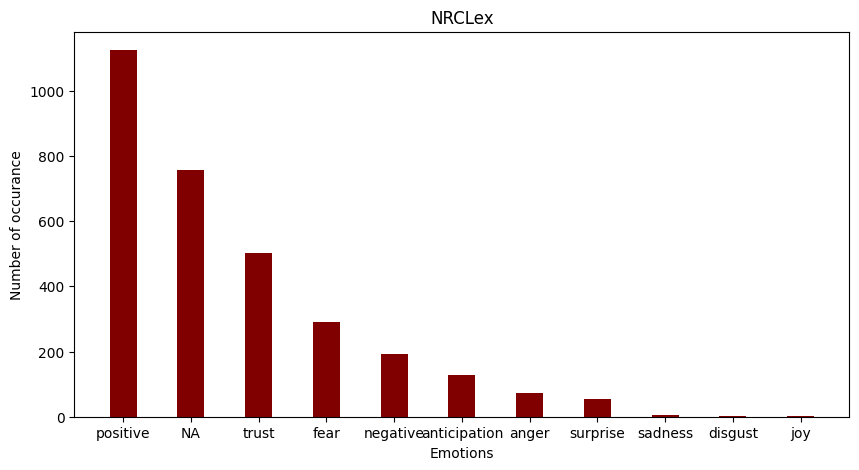

In [ ]:
names = ['positive','NA','trust','fear','negative','anticipation','anger','surprise','sadness','disgust','joy']
values = [1125,758,501,291,191,128,73,54,4,2,2]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(names, values, color ='maroon',
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("Number of occurance")
plt.title("NRCLex")
plt.show()

In [ ]:
positive = ''
NA = ''
trust = ''
fear = ''
negative = ''
anticipation = ''
anger = ''
surprise = ''
sadness = ''
disgust = ''

for i in range(len(tweets_df3['Processed'])):
  if tweets_df3['Top_emo'][i] == 'positive':
    positive = positive + ' ' + tweets_df3['Processed'][i]
  elif tweets_df3['Top_emo'][i] == 'NA':
    NA= NA + ' ' + tweets_df3['Processed'][i]
  elif tweets_df3['Top_emo'][i] == 'trust':
    trust= trust + ' '+ tweets_df3['Processed'][i]
  elif tweets_df3['Top_emo'][i] == 'fear':
    fear= fear + ' ' + tweets_df3['Processed'][i]
  elif tweets_df3['Top_emo'][i] == 'negative':
    negative = negative + ' ' + tweets_df3['Processed'][i]
  elif tweets_df3['Top_emo'][i] == 'anticipation':
    anticipation = anticipation + ' ' + tweets_df3['Processed'][i]
  elif tweets_df3['Top_emo'][i] == 'anger':
    anger= anger + ' '+ tweets_df3['Processed'][i]
  elif tweets_df3['Top_emo'][i] == 'surprise':
    surprise = surprise + ' ' + tweets_df3['Processed'][i]
  elif tweets_df3['Top_emo'][i] == 'sadness':
    sadness= sadness + ' ' + tweets_df3['Processed'][i]


In [ ]:
lista=[positive,NA,trust,fear,negative,anticipation,anger,surprise]

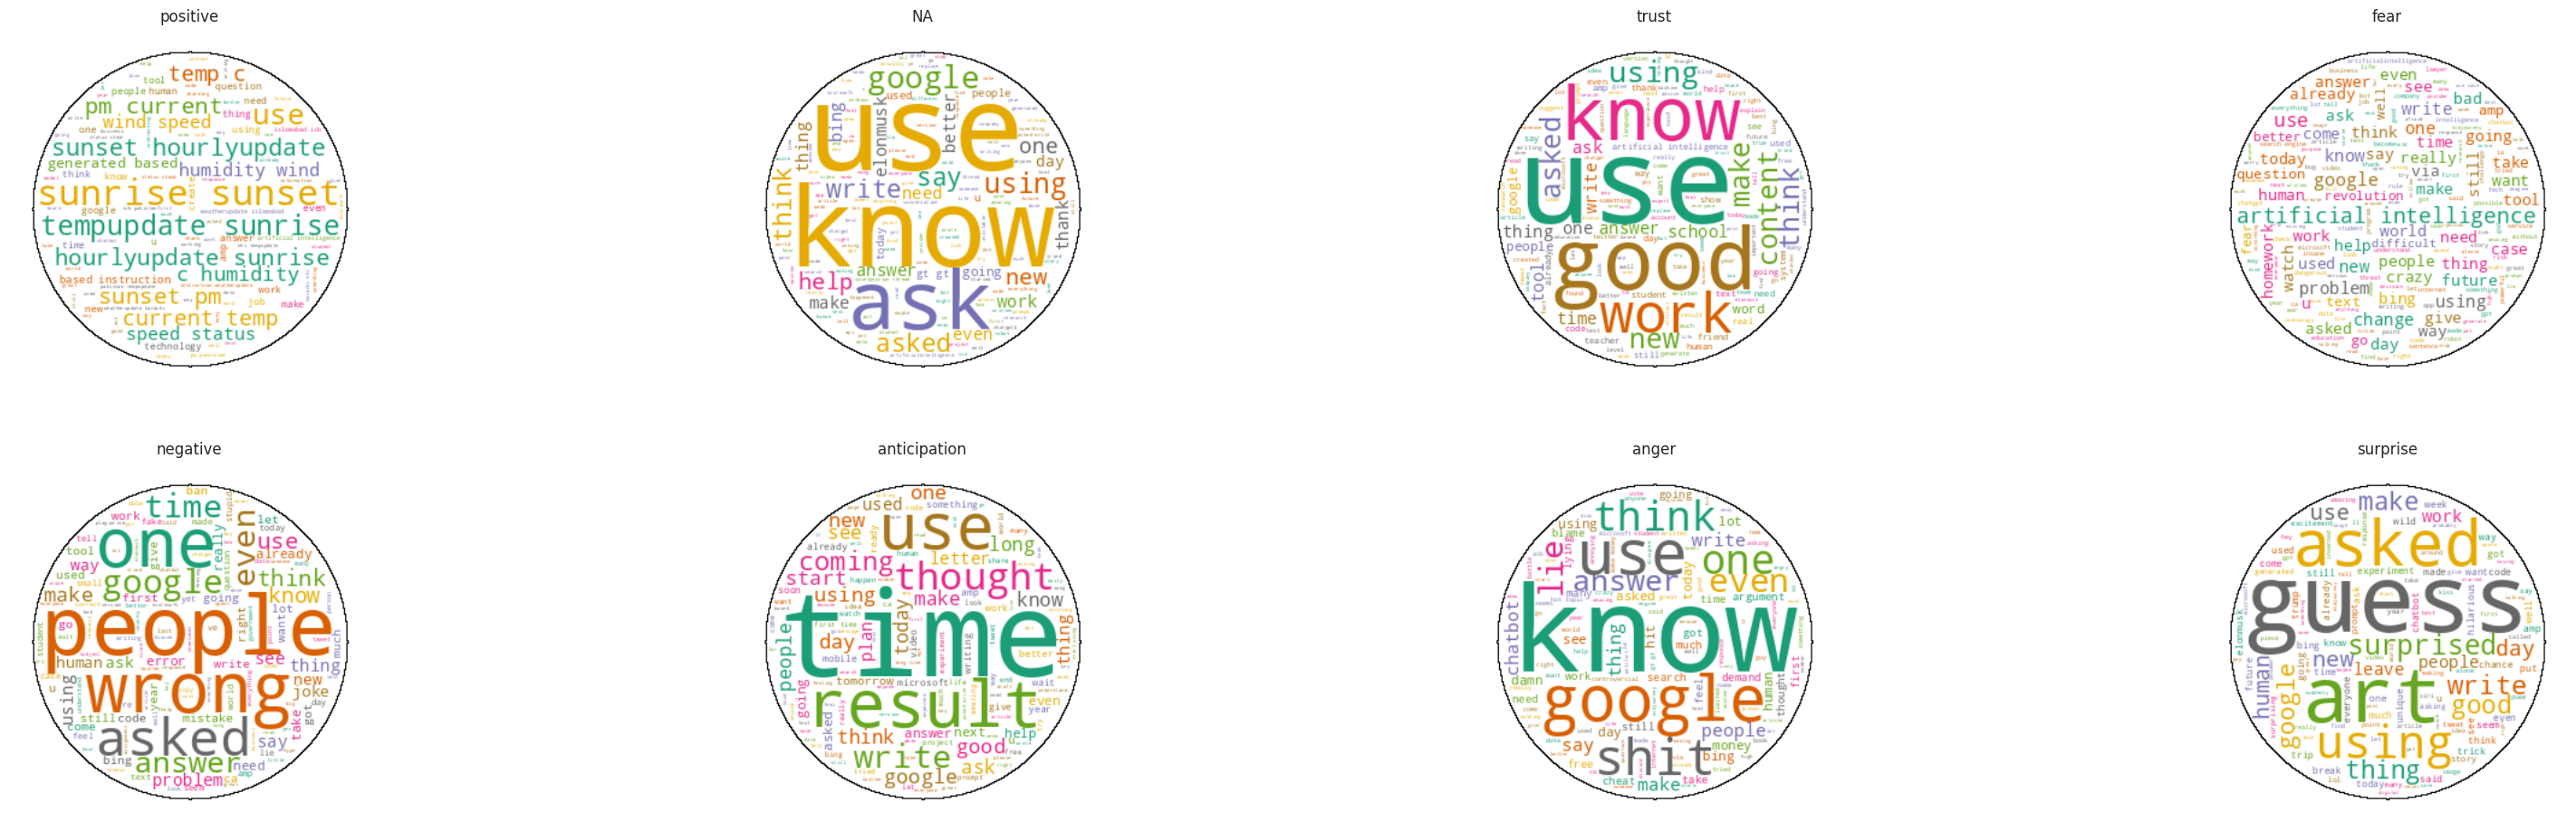

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.set()
plt.rcParams['figure.figsize'] = [40, 30]

#topics_df = pd.DataFrame({'Unnamed: 0': {0: 'positive', 1: 'NA', 2: 'trust', 3: 'fear', 4: 'negative'}, 'Terms per Topic': {0: positive, 1: NA, 2: trust, 3: fear, 4: negative}})
lista2=['positive','NA','trust','fear','negative','anticipation','anger','surprise']
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white", mask=mask, contour_width=0.1,
                      contour_color="black",  max_font_size=100, random_state=42,
                      colormap="Dark2")

for i in range(8):
    wordcloud.generate(text=lista[i])
    plt.subplot(5, 4, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(lista2[i])
plt.show()

Now I will perform an analysis for individual continents

In [ ]:
l1=[]
for i in range(len(tweets_df3['Datetime'])):
  l1.append(tweets_df3['Datetime'][i].strftime("%Y-%m-%d"))
tweets_df3['Date']=l1

In [ ]:
import datetime
start_dt = '20221201'
end_dt = '20230501'
start = datetime.datetime.strptime(start_dt, '%Y%m%d')
end = datetime.datetime.strptime(end_dt, '%Y%m%d')
step = datetime.timedelta(days=1)
date_list = []
while start <= end:
  date_list.append(start.date().strftime("%Y-%m-%d"))
  start += step
date_list[0]

'2022-12-01'

In [ ]:
pozytywne=[]
negatywne=[]
neutralne=[]
['Europe','Africa','West Asia','East Asia','Australia','South America','North America']

for j in date_list:
  l_poz=[]
  l_neg=[]
  l_neu = []

  for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Date'][i] == j:
      l_poz.append(tweets_df3['Positive'][i])
      l_neg.append(tweets_df3['Negative'][i])
      l_neu.append(tweets_df3['Neutral'][i])

  pozytywne.append(np.average(l_poz))
  negatywne.append(np.average(l_neg))
  neutralne.append(np.average(l_neu))


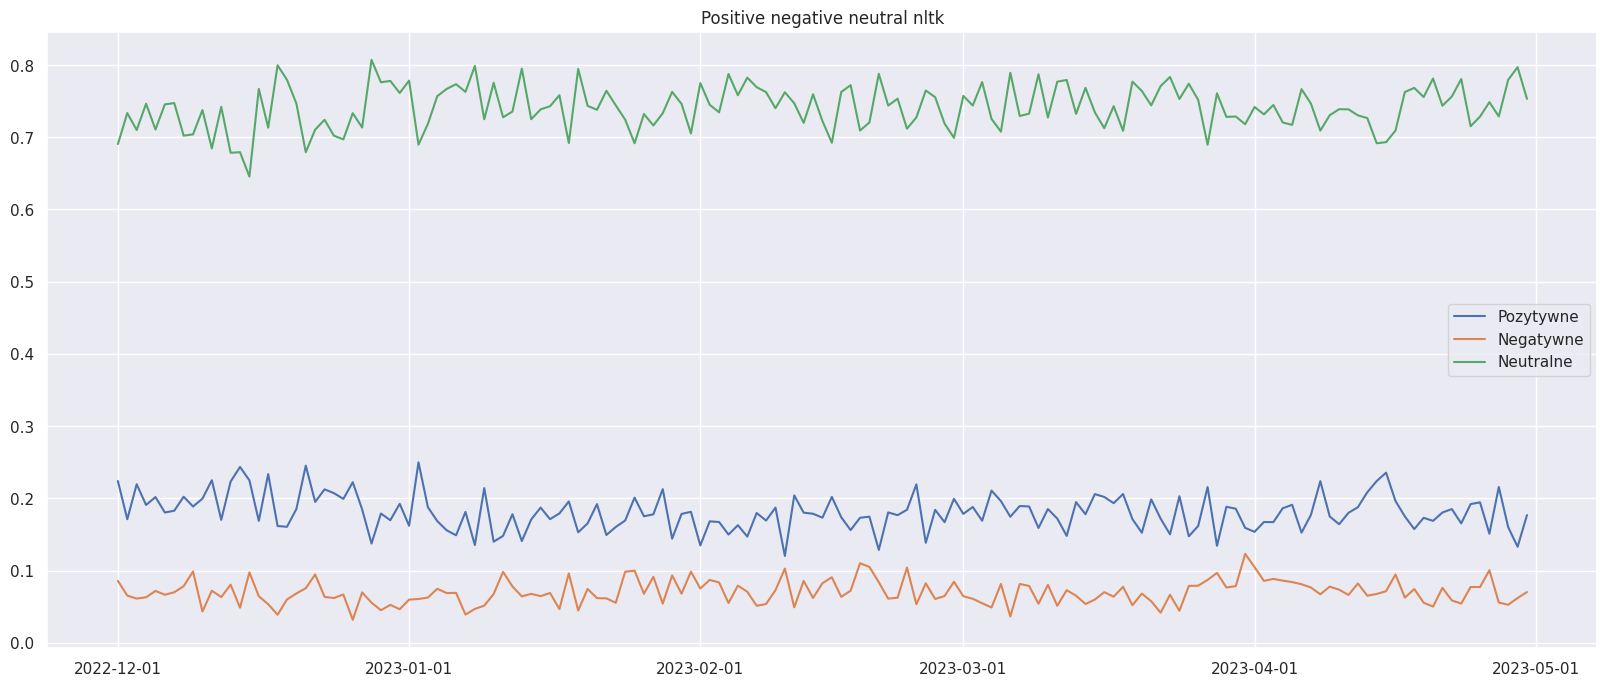

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, pozytywne,label = "Pozytywne")
plt.plot(date_list, negatywne,label = "Negatywne")
plt.plot(date_list, neutralne,label = "Neutralne")
plt.title("Positive negative neutral nltk")
plt.legend()
plt.show()

In [ ]:
pozytywne_Europa=[]
pozytywne_Afryka = []
pozytywne_Azja_Wschodnia=[]
pozytywne_Azja_Zachodnia=[]
pozytywne_Australia=[]
pozytywne_Ameryka_pld = []
pozytywne_Ameryka_pln = []

['Europe','Africa','West Asia','East Asia','Australia','South America','North America']

for j in date_list:
  l_euro=[]
  l_afri=[]
  l_asia_w = []
  l_asia_e = []
  l_aust=[]
  l_amer_n = []
  l_amer_s = []
  for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Date'][i] == j:
      if tweets_df3['Continent'][i] == 'Europe':
        l_euro.append(tweets_df3['Positive'][i])
      if tweets_df3['Continent'][i] == 'Africa':
        l_afri.append(tweets_df3['Positive'][i])
      if tweets_df3['Continent'][i] == 'West Asia':
        l_asia_w.append(tweets_df3['Positive'][i])
      if tweets_df3['Continent'][i] == 'East Asia':
        l_asia_e.append(tweets_df3['Positive'][i])
      if tweets_df3['Continent'][i] == 'Australia':
        l_aust.append(tweets_df3['Positive'][i])
      if tweets_df3['Continent'][i] == 'South America':
        l_amer_s.append(tweets_df3['Positive'][i])
      if tweets_df3['Continent'][i] == 'North America':
        l_amer_n.append(tweets_df3['Positive'][i])

  pozytywne_Europa.append(np.average(l_euro))
  pozytywne_Afryka.append(np.average(l_afri))
  pozytywne_Azja_Wschodnia.append(np.average(l_asia_w))
  pozytywne_Azja_Zachodnia.append(np.average(l_asia_e))
  pozytywne_Australia.append(np.average(l_aust))
  pozytywne_Ameryka_pln.append(np.average(l_amer_n))
  pozytywne_Ameryka_pld.append(np.average(l_amer_s))

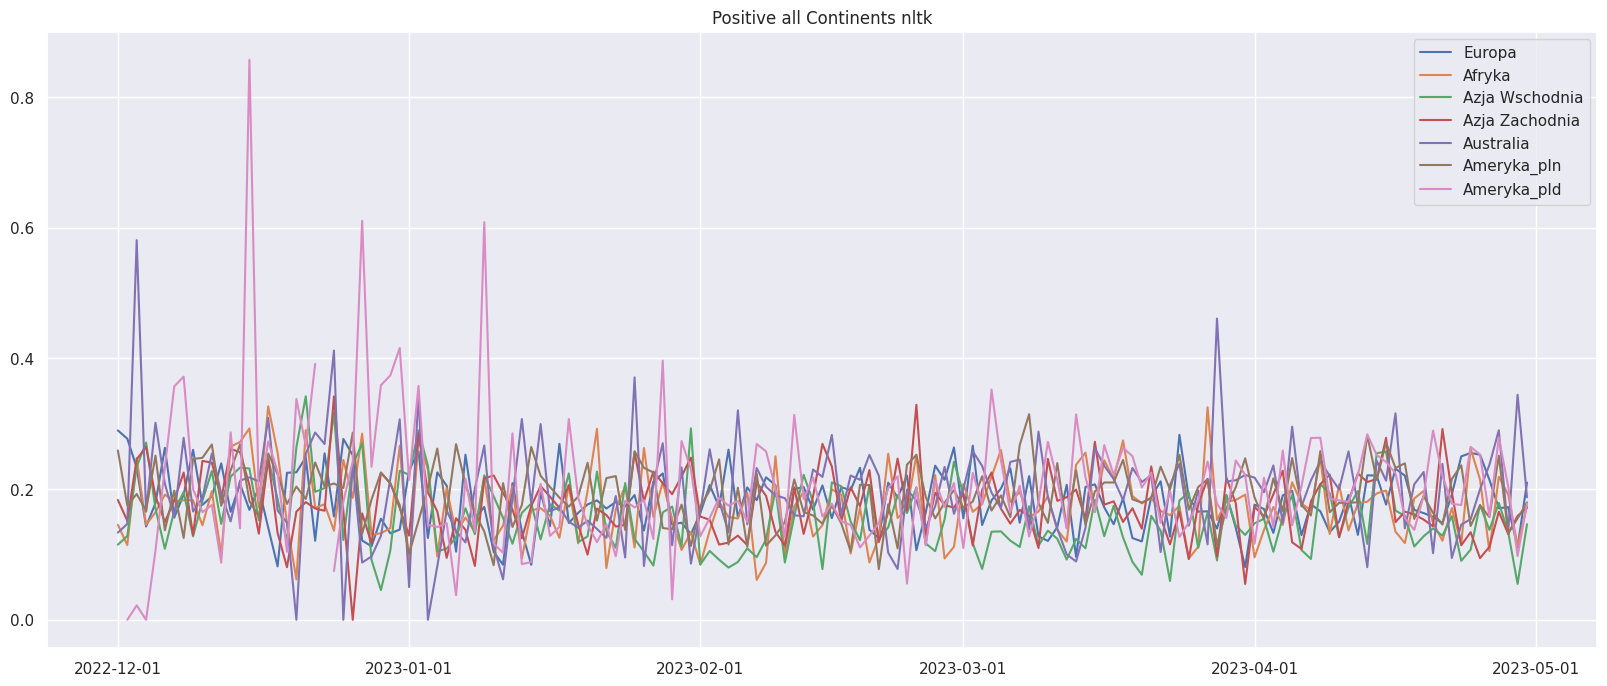

In [ ]:

plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, pozytywne_Europa,label = "Europa")
plt.plot(date_list, pozytywne_Afryka,label = "Afryka")
plt.plot(date_list, pozytywne_Azja_Wschodnia,label = "Azja Wschodnia")
plt.plot(date_list, pozytywne_Azja_Zachodnia,label = "Azja Zachodnia")
plt.plot(date_list, pozytywne_Australia,label = "Australia")
plt.plot(date_list, pozytywne_Ameryka_pln,label = "Ameryka_pln")
plt.plot(date_list, pozytywne_Ameryka_pld,label = "Ameryka_pld")
plt.title("Positive all Continents nltk")
plt.legend()
plt.show()

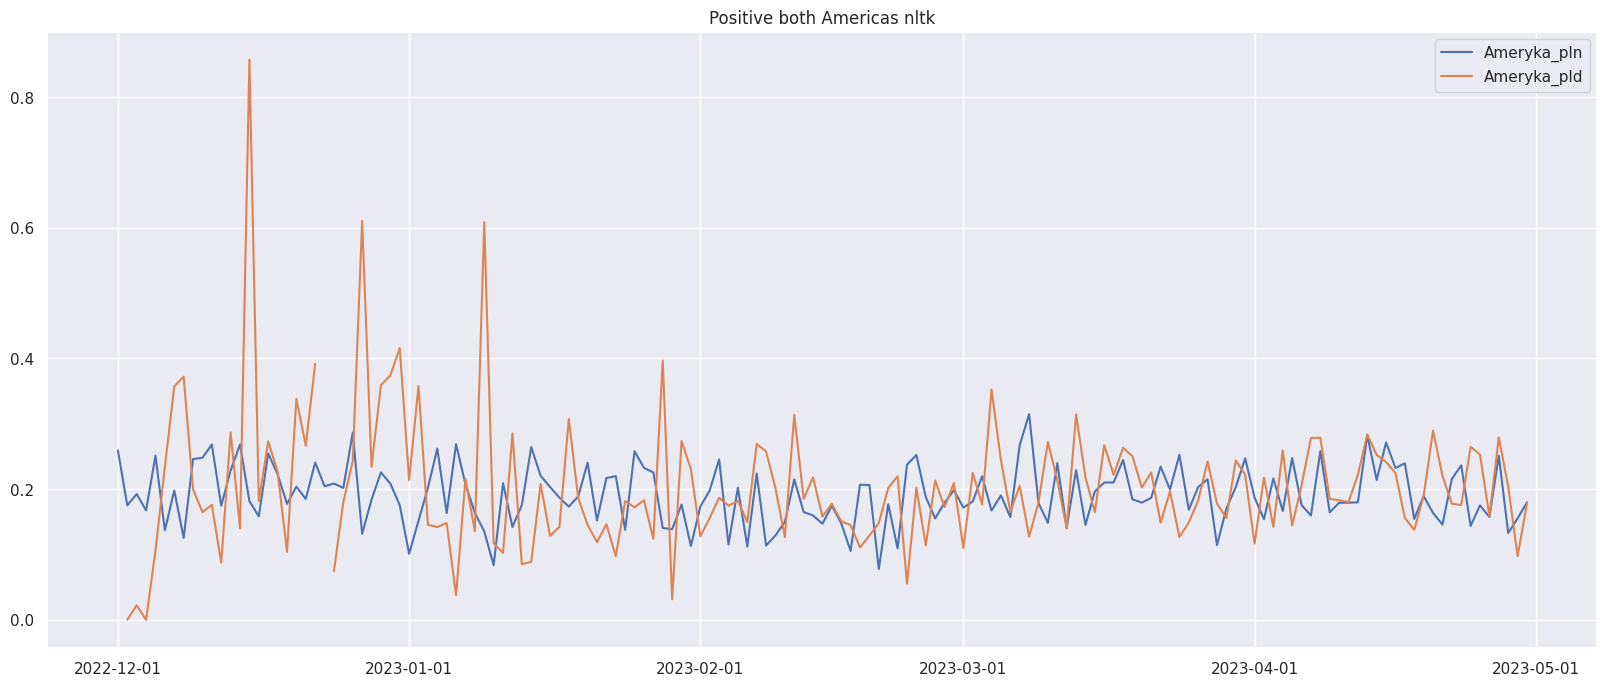

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, pozytywne_Ameryka_pln,label = "Ameryka_pln")
plt.plot(date_list, pozytywne_Ameryka_pld,label = "Ameryka_pld")
plt.title("Positive both Americas nltk")
plt.legend()
plt.show()

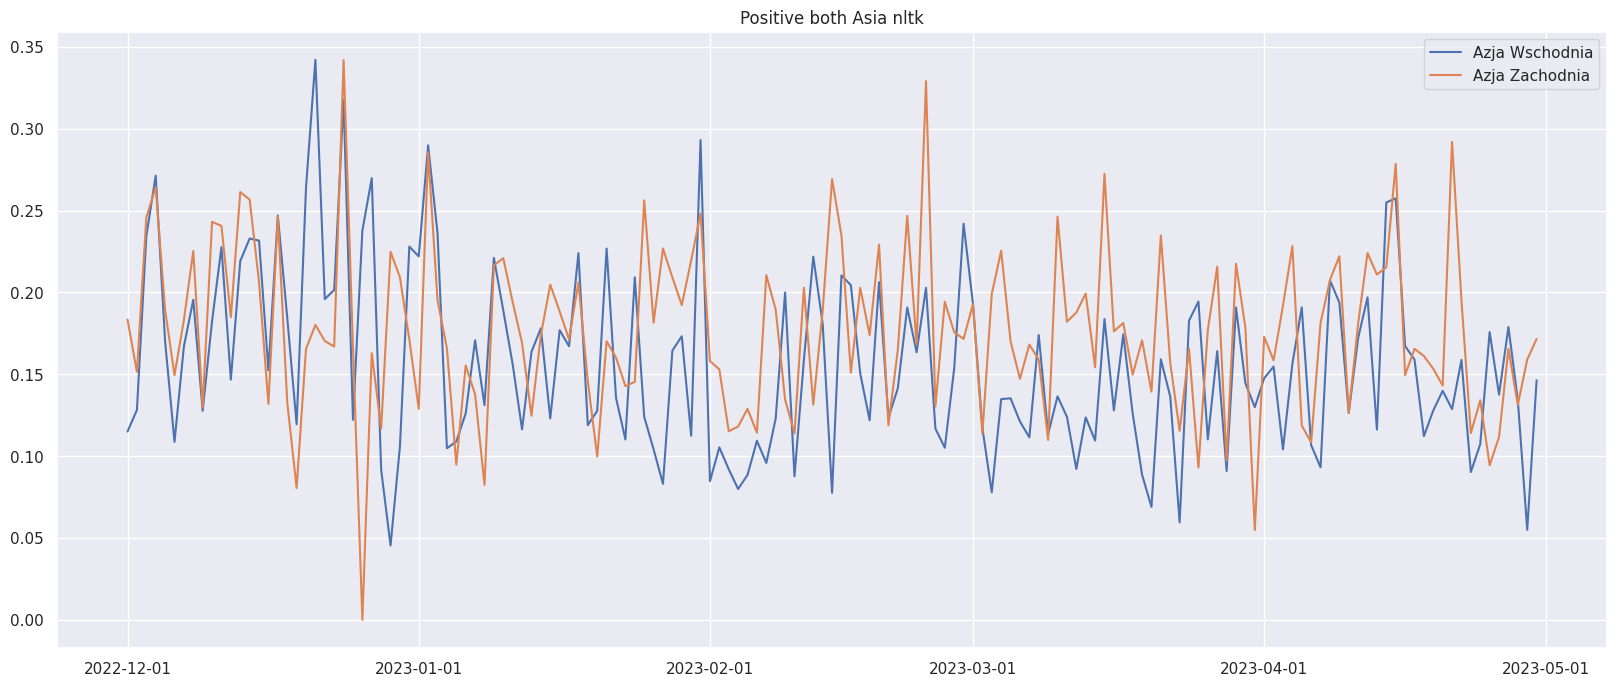

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, pozytywne_Azja_Wschodnia,label = "Azja Wschodnia")
plt.plot(date_list, pozytywne_Azja_Zachodnia,label = "Azja Zachodnia")
plt.title("Positive both Asia nltk")
plt.legend()
plt.show()

In [ ]:
negatywne_Europa=[]
negatywne_Afryka = []
negatywne_Azja_Wschodnia=[]
negatywne_Azja_Zachodnia=[]
negatywne_Australia=[]
negatywne_Ameryka_pld = []
negatywne_Ameryka_pln = []

['Europe','Africa','West Asia','East Asia','Australia','South America','North America']

for j in date_list:
  l_euro=[]
  l_afri=[]
  l_asia_w = []
  l_asia_e = []
  l_aust=[]
  l_amer_n = []
  l_amer_s = []
  for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Date'][i] == j:
      if tweets_df3['Continent'][i] == 'Europe':
        l_euro.append(tweets_df3['Negative'][i])
      if tweets_df3['Continent'][i] == 'Africa':
        l_afri.append(tweets_df3['Negative'][i])
      if tweets_df3['Continent'][i] == 'West Asia':
        l_asia_w.append(tweets_df3['Negative'][i])
      if tweets_df3['Continent'][i] == 'East Asia':
        l_asia_e.append(tweets_df3['Negative'][i])
      if tweets_df3['Continent'][i] == 'Australia':
        l_aust.append(tweets_df3['Negative'][i])
      if tweets_df3['Continent'][i] == 'South America':
        l_amer_s.append(tweets_df3['Negative'][i])
      if tweets_df3['Continent'][i] == 'North America':
        l_amer_n.append(tweets_df3['Negative'][i])

  negatywne_Europa.append(np.average(l_euro))
  negatywne_Afryka.append(np.average(l_afri))
  negatywne_Azja_Wschodnia.append(np.average(l_asia_w))
  negatywne_Azja_Zachodnia.append(np.average(l_asia_e))
  negatywne_Australia.append(np.average(l_aust))
  negatywne_Ameryka_pln.append(np.average(l_amer_n))
  negatywne_Ameryka_pld.append(np.average(l_amer_s))

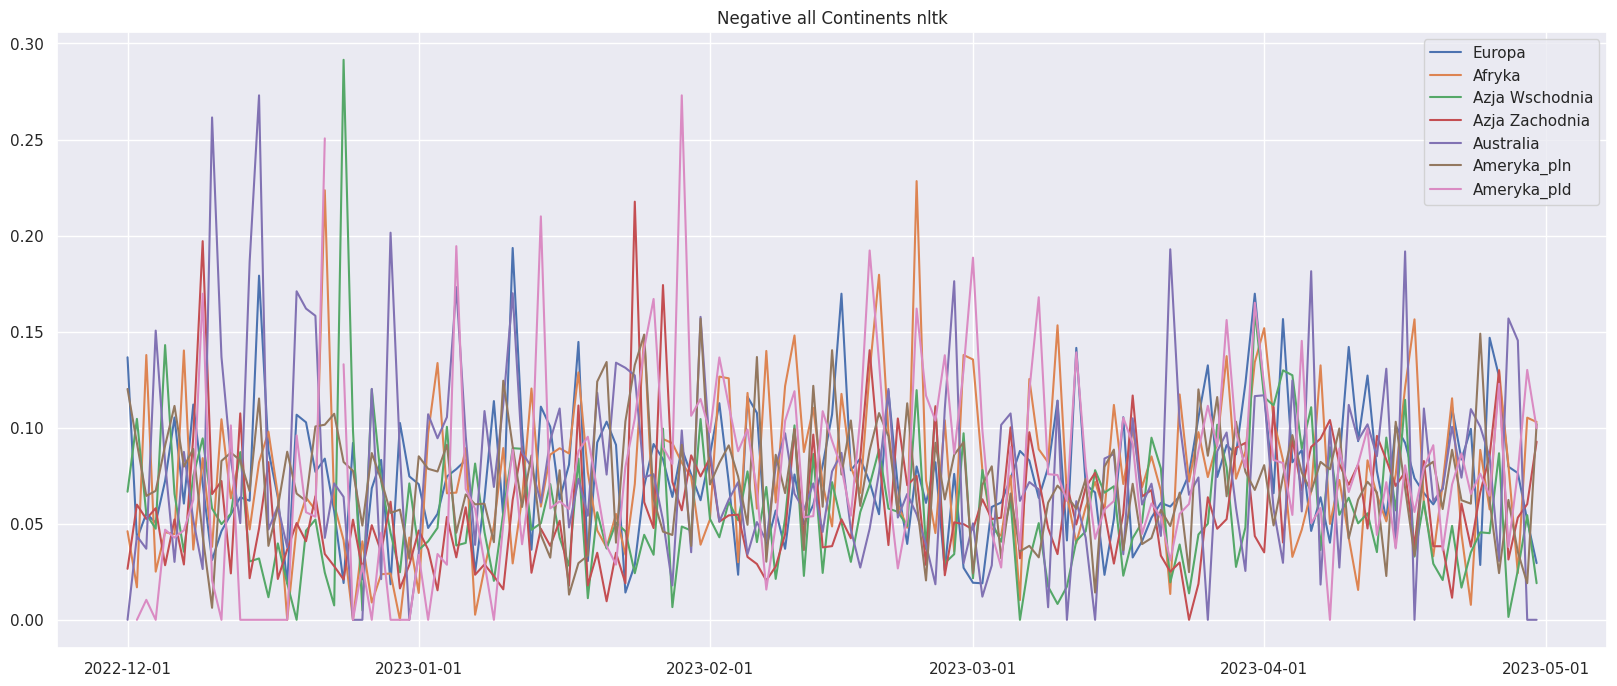

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, negatywne_Europa,label = "Europa")
plt.plot(date_list, negatywne_Afryka,label = "Afryka")
plt.plot(date_list, negatywne_Azja_Wschodnia,label = "Azja Wschodnia")
plt.plot(date_list, negatywne_Azja_Zachodnia,label = "Azja Zachodnia")
plt.plot(date_list, negatywne_Australia,label = "Australia")
plt.plot(date_list, negatywne_Ameryka_pln,label = "Ameryka_pln")
plt.plot(date_list, negatywne_Ameryka_pld,label = "Ameryka_pld")
plt.title("Negative all Continents nltk")
plt.legend()
plt.show()

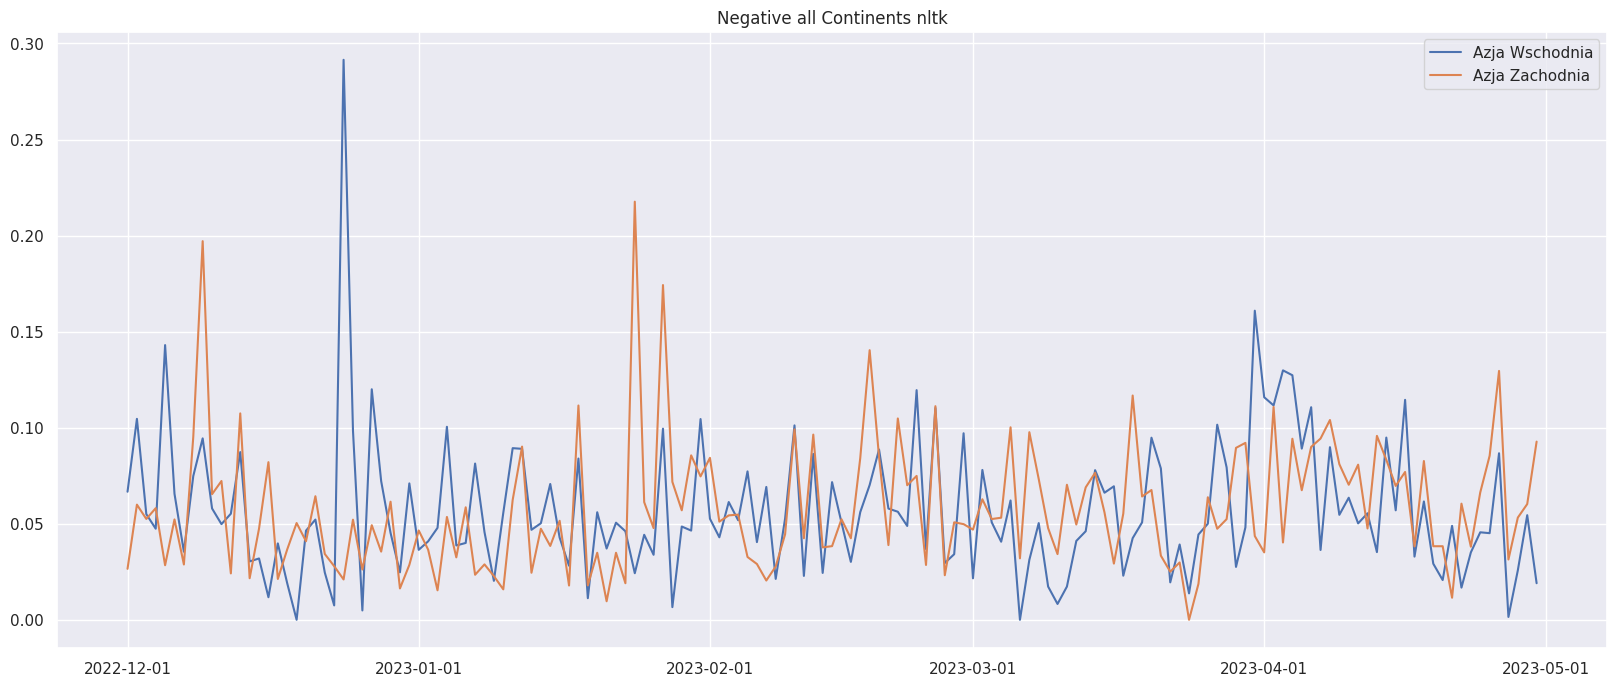

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, negatywne_Azja_Wschodnia,label = "Azja Wschodnia")
plt.plot(date_list, negatywne_Azja_Zachodnia,label = "Azja Zachodnia")
plt.title("Negative both Asia nltk")
plt.legend()
plt.show()

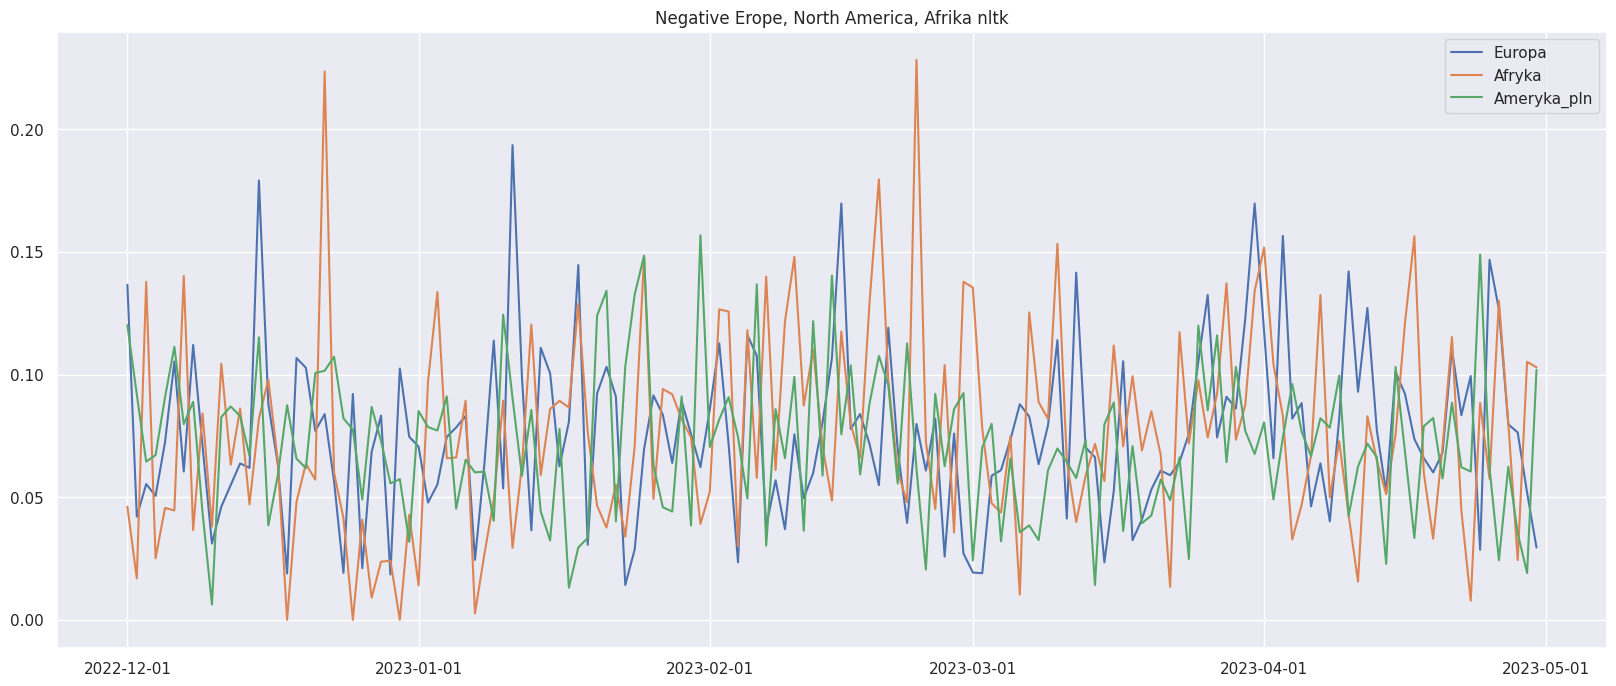

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, negatywne_Europa,label = "Europa")
plt.plot(date_list, negatywne_Afryka,label = "Afryka")
plt.plot(date_list, negatywne_Ameryka_pln,label = "Ameryka_pln")
plt.title("Negative Erope, North America, Afrika nltk")
plt.legend()
plt.show()

In [ ]:
obawa_Europa=[]
obawa_Afryka = []
obawa_Azja_Wschodnia=[]
obawa_Azja_Zachodnia=[]
obawa_Australia=[]
obawa_Ameryka_pld = []
obawa_Ameryka_pln = []

['Europe','Africa','West Asia','East Asia','Australia','South America','North America']

for j in date_list:
  l_euro=[]
  l_afri=[]
  l_asia_w = []
  l_asia_e = []
  l_aust=[]
  l_amer_n = []
  l_amer_s = []
  for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Date'][i] == j:
      if tweets_df3['Continent'][i] == 'Europe':
        l_euro.append(tweets_df3['Fear'][i])
      if tweets_df3['Continent'][i] == 'Africa':
        l_afri.append(tweets_df3['Fear'][i])
      if tweets_df3['Continent'][i] == 'West Asia':
        l_asia_w.append(tweets_df3['Fear'][i])
      if tweets_df3['Continent'][i] == 'East Asia':
        l_asia_e.append(tweets_df3['Fear'][i])
      if tweets_df3['Continent'][i] == 'Australia':
        l_aust.append(tweets_df3['Fear'][i])
      if tweets_df3['Continent'][i] == 'South America':
        l_amer_s.append(tweets_df3['Fear'][i])
      if tweets_df3['Continent'][i] == 'North America':
        l_amer_n.append(tweets_df3['Fear'][i])

  obawa_Europa.append(np.average(l_euro))
  obawa_Afryka.append(np.average(l_afri))
  obawa_Azja_Wschodnia.append(np.average(l_asia_w))
  obawa_Azja_Zachodnia.append(np.average(l_asia_e))
  obawa_Australia.append(np.average(l_aust))
  obawa_Ameryka_pln.append(np.average(l_amer_n))
  obawa_Ameryka_pld.append(np.average(l_amer_s))

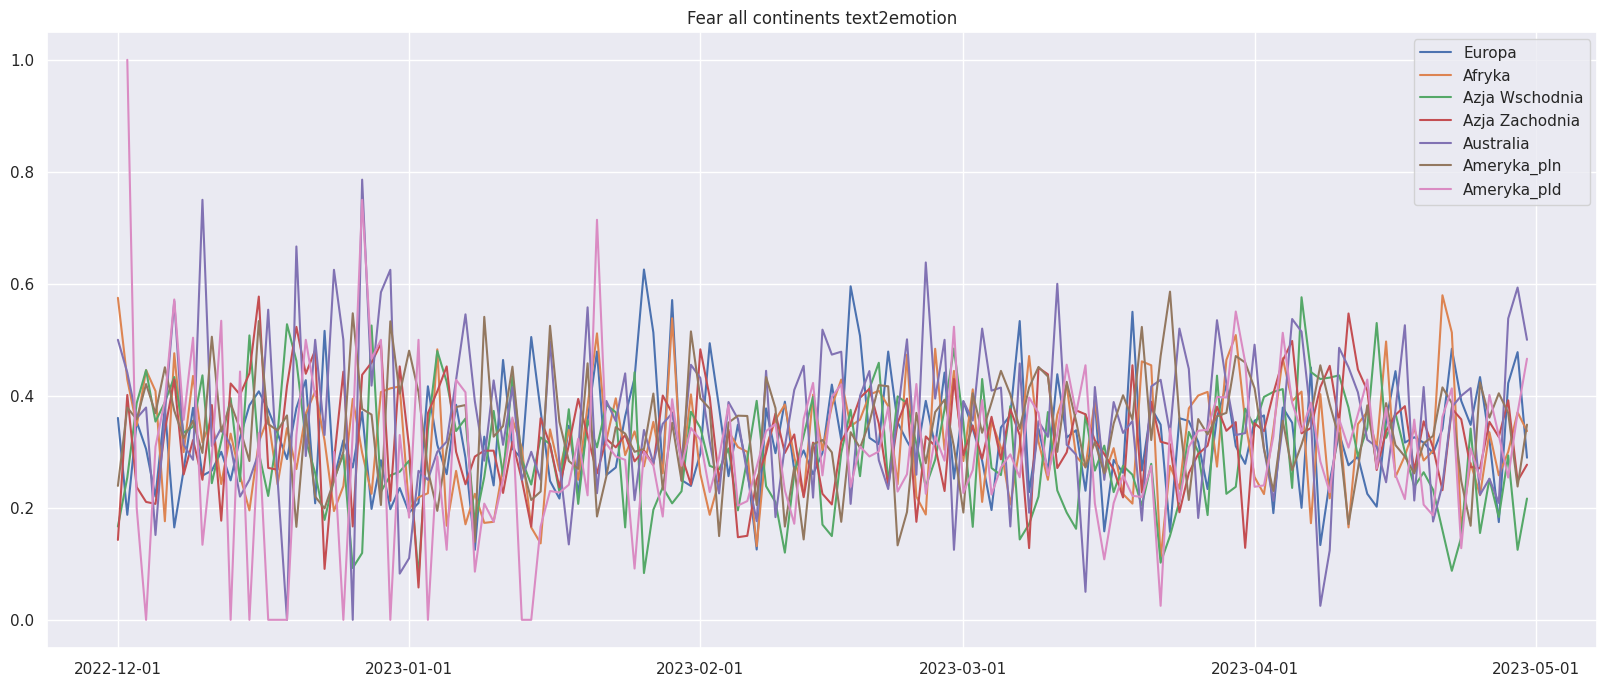

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, obawa_Europa,label = "Europa")
plt.plot(date_list, obawa_Afryka,label = "Afryka")
plt.plot(date_list, obawa_Azja_Wschodnia,label = "Azja Wschodnia")
plt.plot(date_list, obawa_Azja_Zachodnia,label = "Azja Zachodnia")
plt.plot(date_list, obawa_Australia,label = "Australia")
plt.plot(date_list, obawa_Ameryka_pln,label = "Ameryka_pln")
plt.plot(date_list, obawa_Ameryka_pld,label = "Ameryka_pld")
plt.title("Fear all continents text2emotion")
plt.legend()
plt.show()

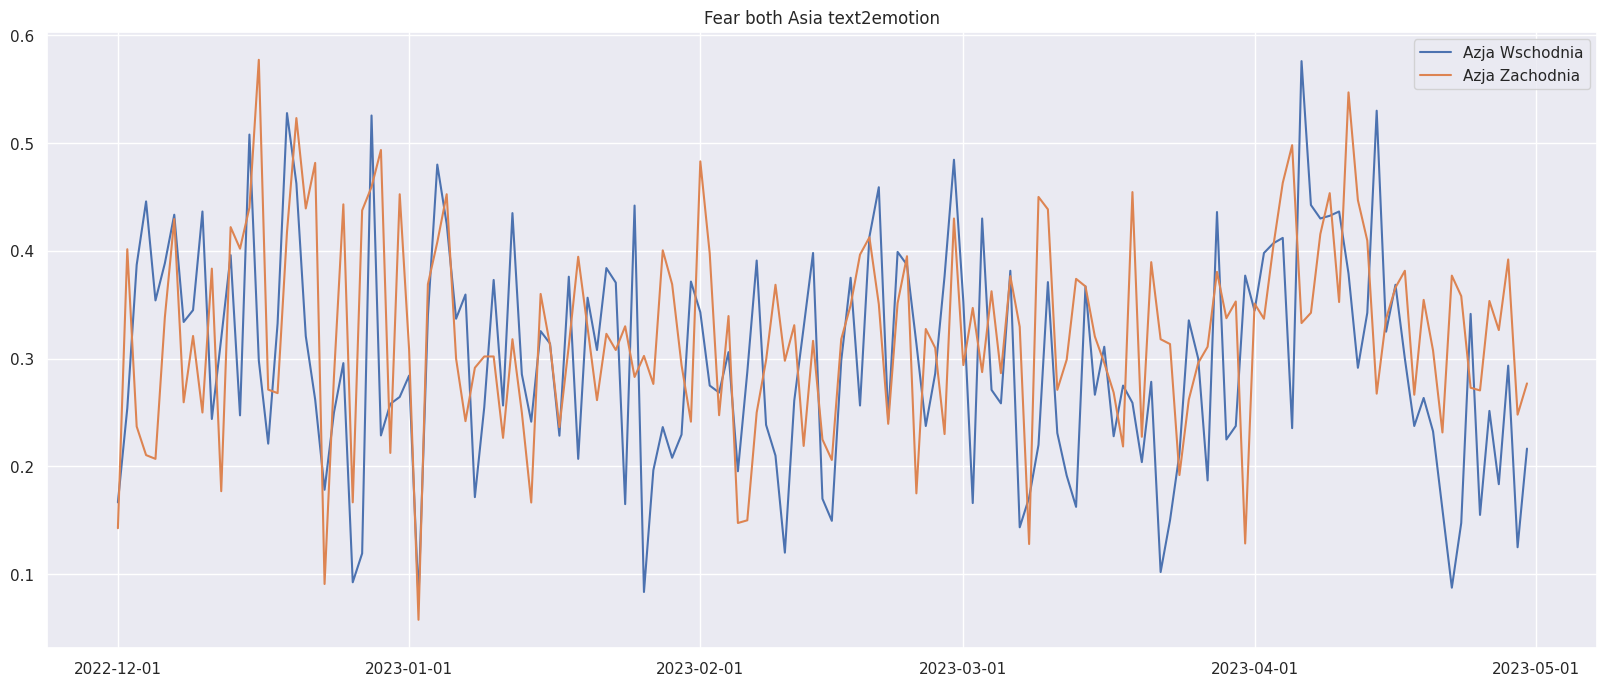

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, obawa_Azja_Wschodnia,label = "Azja Wschodnia")
plt.plot(date_list, obawa_Azja_Zachodnia,label = "Azja Zachodnia")
plt.title("Fear both Asia text2emotion")
plt.legend()
plt.show()

In [ ]:
obawa=[]

['Europe','Africa','West Asia','East Asia','Australia','South America','North America']

for j in date_list:
  l_obaw=[]
  for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Date'][i] == j:
      l_obaw.append(tweets_df3['Fear'][i])

  obawa.append(np.average(l_obaw))


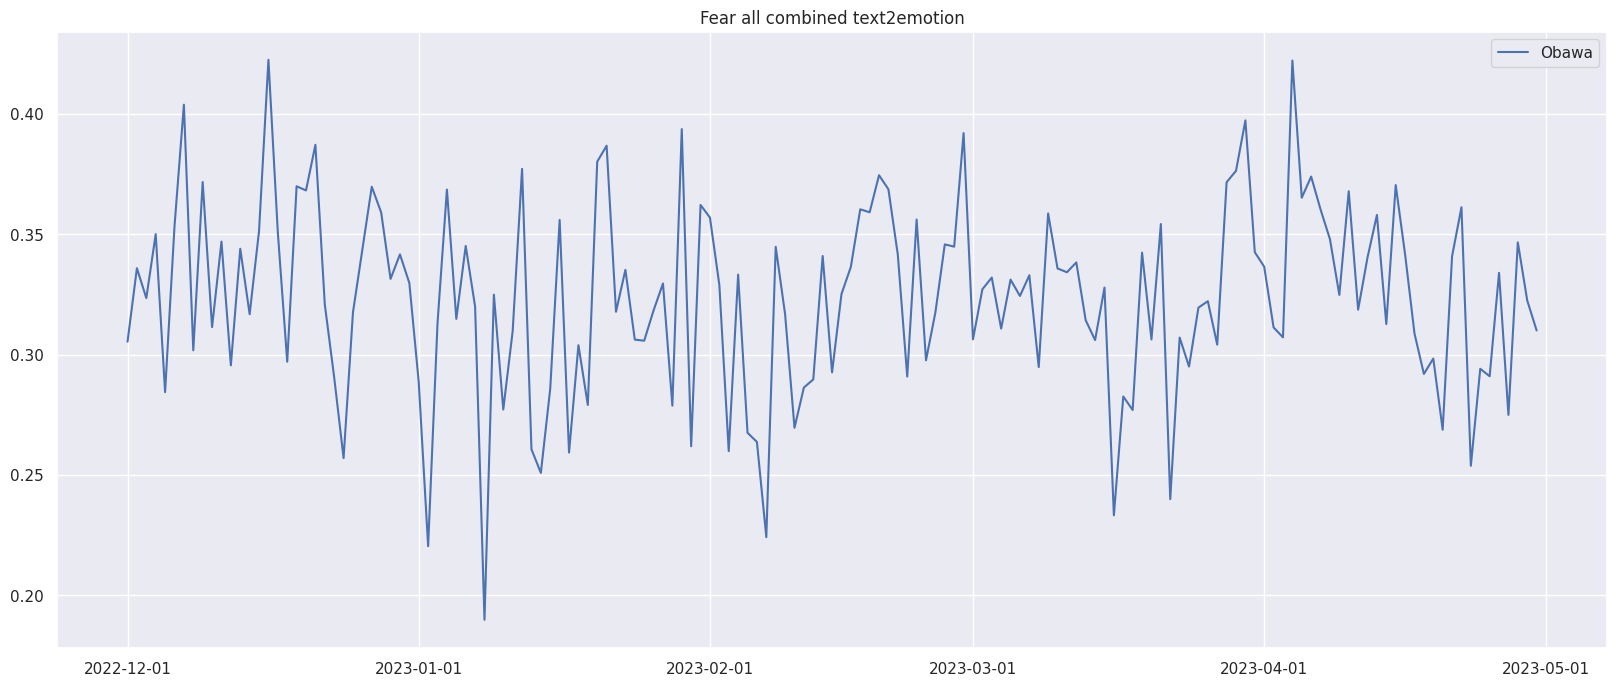

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, obawa,label = "Obawa")
plt.title("Fear all combined text2emotion")
plt.legend()
plt.show()

In [ ]:
obawa=[]
smutek=[]
radosc=[]

['Europe','Africa','West Asia','East Asia','Australia','South America','North America']

for j in date_list:
  l_obaw=[]
  l_smut=[]
  l_pozy=[]
  for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Date'][i] == j:
      l_obaw.append(tweets_df3['Fear'][i])
      l_smut.append(tweets_df3['Sad'][i])
      l_pozy.append(tweets_df3['Happy'][i])

  obawa.append(np.average(l_obaw))
  smutek.append(np.average(l_smut))
  radosc.append(np.average(l_pozy))

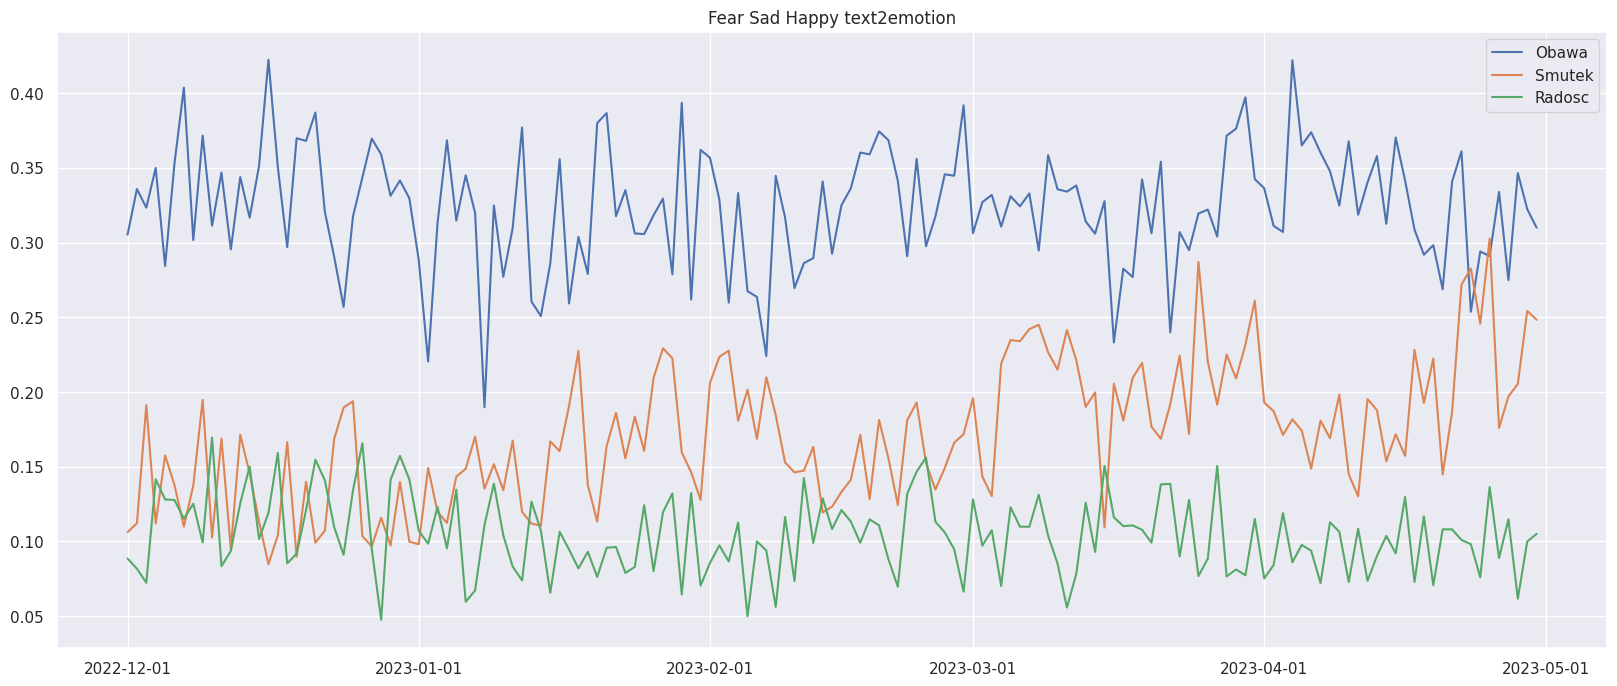

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, obawa,label = "Obawa")
plt.plot(date_list, smutek,label = "Smutek")
plt.plot(date_list, radosc,label = "Radosc")
plt.title("Fear Sad Happy text2emotion")
plt.legend()
plt.show()

In [ ]:
smutek_Europa=[]
smutek_Afryka = []
smutek_Azja_Wschodnia=[]
smutek_Azja_Zachodnia=[]
smutek_Australia=[]
smutek_Ameryka_pld = []
smutek_Ameryka_pln = []

['Europe','Africa','West Asia','East Asia','Australia','South America','North America']

for j in date_list:
  l_euro=[]
  l_afri=[]
  l_asia_w = []
  l_asia_e = []
  l_aust=[]
  l_amer_n = []
  l_amer_s = []
  for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Date'][i] == j:
      if tweets_df3['Continent'][i] == 'Europe':
        l_euro.append(tweets_df3['Sad'][i])
      if tweets_df3['Continent'][i] == 'Africa':
        l_afri.append(tweets_df3['Sad'][i])
      if tweets_df3['Continent'][i] == 'West Asia':
        l_asia_w.append(tweets_df3['Sad'][i])
      if tweets_df3['Continent'][i] == 'East Asia':
        l_asia_e.append(tweets_df3['Sad'][i])
      if tweets_df3['Continent'][i] == 'Australia':
        l_aust.append(tweets_df3['Sad'][i])
      if tweets_df3['Continent'][i] == 'South America':
        l_amer_s.append(tweets_df3['Sad'][i])
      if tweets_df3['Continent'][i] == 'North America':
        l_amer_n.append(tweets_df3['Sad'][i])

  smutek_Europa.append(np.average(l_euro))
  smutek_Afryka.append(np.average(l_afri))
  smutek_Azja_Wschodnia.append(np.average(l_asia_w))
  smutek_Azja_Zachodnia.append(np.average(l_asia_e))
  smutek_Australia.append(np.average(l_aust))
  smutek_Ameryka_pln.append(np.average(l_amer_n))
  smutek_Ameryka_pld.append(np.average(l_amer_s))

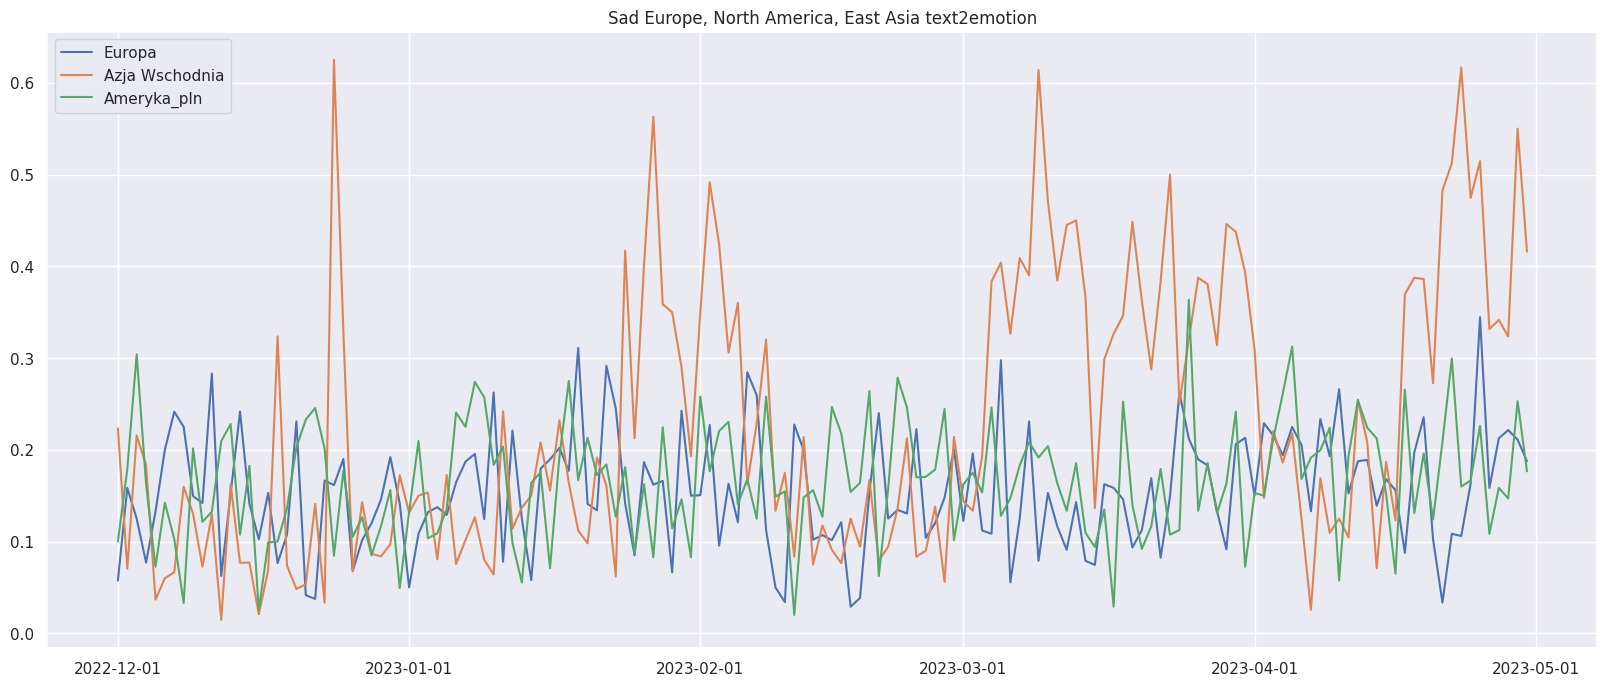

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, smutek_Europa,label = "Europa")
plt.plot(date_list, smutek_Azja_Wschodnia,label = "Azja Wschodnia")
plt.plot(date_list, smutek_Ameryka_pln,label = "Ameryka_pln")
plt.title("Sad Europe, North America, East Asia text2emotion")
plt.legend()
plt.show()

In [ ]:
obawa=[]
pozytywne=[]
obaw=0
pozy=0
['Europe','Africa','West Asia','East Asia','Australia','South America','North America']

for j in date_list:
  for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Date'][i] == j:
      if tweets_df3['Top_emo'][i]=='fear':
        obaw+=1
      if tweets_df3['Top_emo'][i]=='positive':
        pozy+=1

  obawa.append(obaw)
  pozytywne.append(pozy)

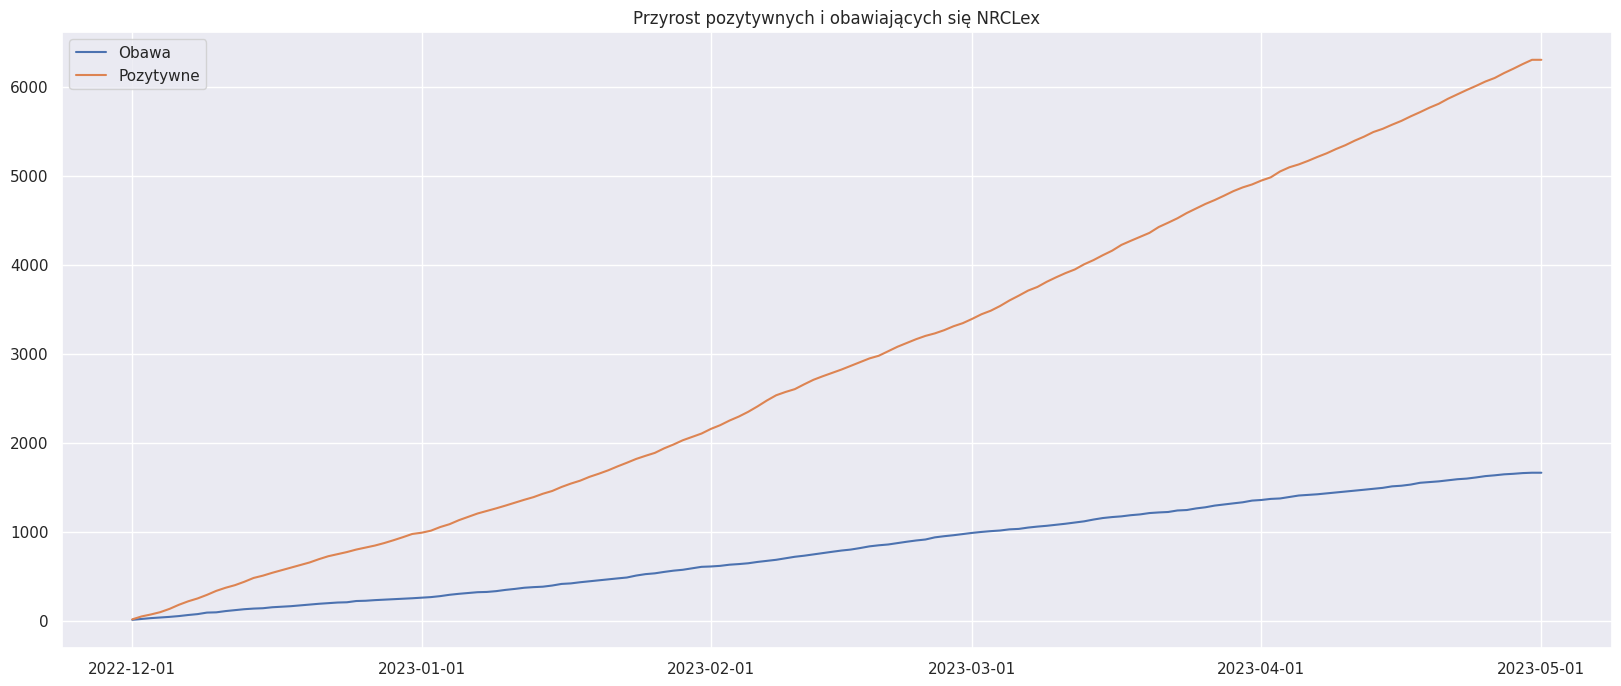

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks([0,31,62,90,121,151])
plt.plot(date_list, obawa,label = "Obawa")
plt.plot(date_list, pozytywne,label = "Pozytywne")
plt.title("Przyrost pozytywnych i obawiających się NRCLex")
plt.legend()
plt.show()

In [ ]:
values=[]
l_euro=0
l_afri=0
l_asia_w = 0
l_asia_e = 0
l_aust=0
l_amer_n = 0
l_amer_s = 0
for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Top_emo'][i]=='fear':
      if tweets_df3['Continent'][i] == 'Europe':
        l_euro+=1
      if tweets_df3['Continent'][i] == 'Africa':
        l_afri+=1
      if tweets_df3['Continent'][i] == 'West Asia':
        l_asia_w+=1
      if tweets_df3['Continent'][i] == 'East Asia':
        l_asia_e+=1
      if tweets_df3['Continent'][i] == 'Australia':
        l_aust+=1
      if tweets_df3['Continent'][i] == 'South America':
        l_amer_s+=1
      if tweets_df3['Continent'][i] == 'North America':
        l_amer_n+=1
values.append(l_euro)
values.append(l_afri)
values.append(l_asia_w)
values.append(l_asia_e)
values.append(l_aust)
values.append(l_amer_n)
values.append(l_amer_s)

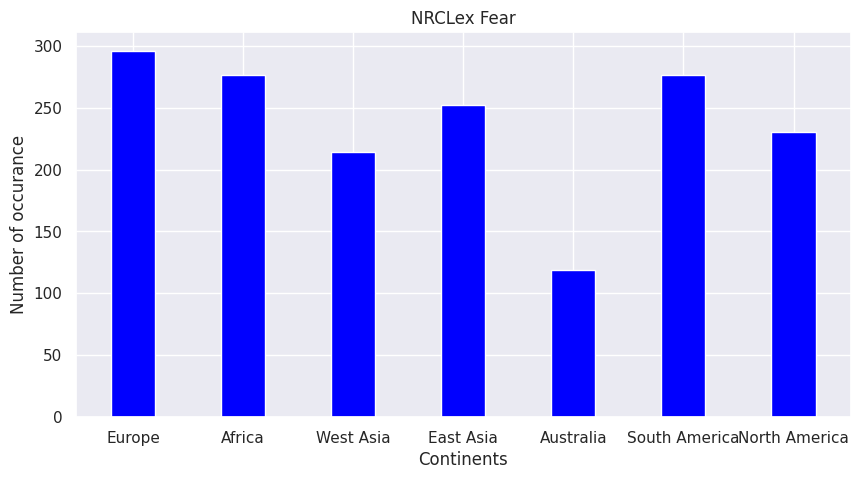

In [ ]:
names = ['Europe','Africa','West Asia','East Asia','Australia','South America','North America']
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(names, values, color ='blue',
        width = 0.4)

plt.xlabel("Continents")
plt.ylabel("Number of occurance")
plt.title("NRCLex Fear")
plt.show()

In [ ]:
values1=[]
l_euro=0
l_afri=0
l_asia_w = 0
l_asia_e = 0
l_aust=0
l_amer_n = 0
l_amer_s = 0
for i in range(len(tweets_df3['Date'])):
    if tweets_df3['Top_emo'][i]=='positive':
      if tweets_df3['Continent'][i] == 'Europe':
        l_euro+=1
      if tweets_df3['Continent'][i] == 'Africa':
        l_afri+=1
      if tweets_df3['Continent'][i] == 'West Asia':
        l_asia_w+=1
      if tweets_df3['Continent'][i] == 'East Asia':
        l_asia_e+=1
      if tweets_df3['Continent'][i] == 'Australia':
        l_aust+=1
      if tweets_df3['Continent'][i] == 'South America':
        l_amer_s+=1
      if tweets_df3['Continent'][i] == 'North America':
        l_amer_n+=1
values1.append(l_euro)
values1.append(l_afri)
values1.append(l_asia_w)
values1.append(l_asia_e)
values1.append(l_aust)
values1.append(l_amer_n)
values1.append(l_amer_s)

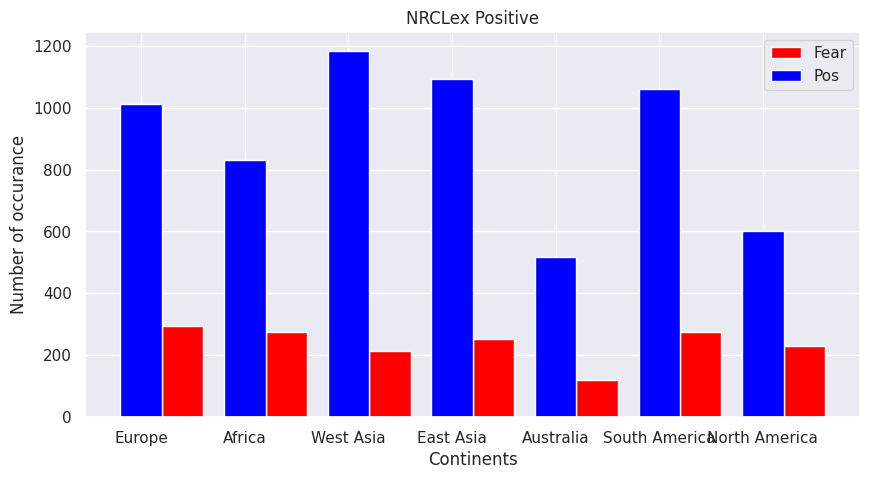

In [ ]:
names = ['Europe','Africa','West Asia','East Asia','Australia','South America','North America']
values=values
fig = plt.figure(figsize = (10, 5))

X_axis = np.arange(len(names))
# creating the bar plot
plt.bar(X_axis+0.4, values, color ='red',width=0.4, label = 'Fear')
plt.bar(X_axis+0.0, values1, color ='blue',width=0.4,label = 'Pos')

plt.xticks(X_axis, names)

plt.xlabel("Continents")
plt.ylabel("Number of occurance")
plt.title("NRCLex Positive")
plt.legend()
plt.show()

In [ ]:
values1
values

[296, 276, 214, 252, 119, 276, 230]

In [ ]:
# paczki z emocjami
# NRCLex
# Text blob
# leXmo